<a href="https://colab.research.google.com/github/sumants-dev/CIS545-Project/blob/main/Seasonal_weather_data__analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIS 545 - Weather Big Data Analysis

# 0 Introduction

* Team members:  Ashley Chang, Dana Yang, Sumant Shringari

**Our thesis: **

Hypothesis: can we predict the weather pattern using data relating to pollution?  
> Analyze if air pollution indicators such as co, pm2.5 and population have effect on overall seasonal tempature for each city. 
> Understand if air pollution indicator can use to be predict the tempature trends. 



**Our approach**

Part 1 : Data cleaning and wrangling 
0. Merge datasets from 2019- 2021
1. Transformed the ACQIN data set and extract out the features 
2. Dropped any null or non descriptive values from the ACQIN dataset 
3. Filled in missing data for population dataset 
4. Joined the ACQIN dataset with population dataset
5. Set date range as index for

Part 2 : Exploratory data analysis 
1. Plot the overall pollution trends at the country level 
2. Plot the highest pollution city 
3. Plot the timeseries of the top polluters 
4. Plot the timeseries of tempature vs pollution 

Part 3: For this set of data we experimented with different approach to evulate the best result. Overall, below is the highlevel appraoch we took.  
0.  Looked at correlation graph to pick the features 
1.  Apply Regression SVM 
2.  Apply PCA 
3.  Apply GridSearch prior to random forest regression 
4.  Apply Regressor Random forest 
5.  Apply times series with arima 

**Our data set consist of:** 

  Air pollution at city level 
    * Date range: monthly from 2019 - 2021
    * Data set has about 500,000 + records 
   
  Population at city level 
    * Date range: Annual 2019 - 2021
    * Data set has about 1200 + records 


**Overview of results **

EDA observations: 

*   In the winter month when the tempature are lower, there is a higher rate of pollution (based on PM2.5). The relationship between the pollution and tempature is an inverse relationship.
*   The is a gradual decrease in pollutions overall across all the cities. 
*   There is a gradual increase in highest and lowest tempature. More extreme weather patterns based on the aggregated average across the cities. 

Model observations: 
> each of our models will be measured by using MSE and MAE. 
* Overall, all three models performed fairly well with Arima model having the best MSE and MAE. 
* The Random Forest Regressor was able to out perform the SVM regressor results. 
* The Arimia model at the best achieved 7.37 MSE and 0.87 MAE result and was able to fairly accurately predict the tempature with the given features. 
> we selected the cities with high pollution for our Arimia model and majority of these cities performed fairly well. There is a few exception. Some due to missing data and potentially other model tunning needed. 

Note: For the SVM Regression Model and Random Forest Rgression Model we treid it with three different starting data sets.
Dataset 1: Weather pollution data with population
Dataset 2: Weather pollution data cleand and population
Dataset 3: Weather pollution data cleandvalues 

The reason we did this was because after the join with population we loose some data records. Similarly, after dropping non deterministic values we are dropping some records as well. 
* cleaned referring to having some record with non-deterministic values dropped 


** Challenges  **

1. Finding a large weather dataset with enough features. 
> For example, not dropping too many data points from merging different data sets. We experimented with 4-5 different data sets.
2. Identifying the right models to use. 
> We experimented with some categorical models then realized that it’s not a good fit for the type of data we had.
3. Figuring out the right p d q values to use for Arima model.
4. Balancing data cleaning. 
> For the city level data set we had to experiment with Cleaning the data to remove 0 values but not dropping too many records. 
5. Transforming and wrangling the dataset, so it is in the right dimension for doing training.
6. Timing out on run time in colab.
> We shift to running the models locally to optimize efficiency of trialing different input parameters and tune the model. 
7. Changing the split of train, valid, test. 
> Instead of using random split we switched to assigning the train valid and test based on date range. 


### 1.0 Importing data and library

In [390]:
%%capture
!pip install pandasql
!pip install pandas
!pip install requests
!pip install lxml
!pip install nltk
!pip install pandasql

In [391]:
%%capture
# Imports
import pandas as pd
import pandasql as psql
from lxml import html
import requests
import nltk


In [392]:
%%capture
!pip install matplotlib
!pip install seaborn

In [4]:
import numpy as np 
import json
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from datetime import datetime
from datetime import timedelta
import glob
import seaborn as sns
import re
import os

Import Datasets from 2019 - 2021 

In [5]:
air_polution_pd = pd.read_csv("./Data/raw/PM2.5 Global Air Pollution 2010-2017.csv")

Importing 2021 data

In [6]:
acqin_data_pd21 = pd.read_csv("./Data/raw/waqi-covid19-airqualitydata-2020.csv", error_bad_lines=False, header = 0, skiprows=4)

/Users/ashleyfchang/opt/anaconda3/envs/cis545/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


Importing 2020 data

In [11]:
acqin_data_pd20_Q1 = pd.read_csv("./Data/raw/waqi-covid19-airqualitydata-2020Q1.csv", error_bad_lines=False, header = 0, skiprows=4)
acqin_data_pd20_Q2 = pd.read_csv("./Data/raw/waqi-covid19-airqualitydata-2020Q2.csv", error_bad_lines=False, header = 0, skiprows=4)
acqin_data_pd20_Q3 = pd.read_csv("./Data/raw/waqi-covid19-airqualitydata-2020Q3.csv", error_bad_lines=False, header = 0, skiprows=4)
acqin_data_pd20_Q4 = pd.read_csv("./Data/raw/waqi-covid19-airqualitydata-2020Q4.csv", error_bad_lines=False, header = 0, skiprows=4)

Importing 2019 data 

In [13]:
acqin_data_pd19_Q1 = pd.read_csv("./Data/raw/waqi-covid19-airqualitydata-2019Q1.csv", error_bad_lines=False, header = 0, skiprows=4)
acqin_data_pd19_Q2 = pd.read_csv("./Data/raw/waqi-covid19-airqualitydata-2019Q2.csv", error_bad_lines=False, header = 0, skiprows=4)
acqin_data_pd19_Q3 = pd.read_csv("./Data/raw/waqi-covid19-airqualitydata-2019Q3.csv", error_bad_lines=False, header = 0, skiprows=4)
acqin_data_pd19_Q4 = pd.read_csv("./Data/raw/waqi-covid19-airqualitydata-2019Q4.csv", error_bad_lines=False, header = 0, skiprows=4)

In [15]:
population = pd.read_csv("./Data/raw/city_population.csv")

## 1.2 ACQIN air polution dataset data cleaning and wrangling

Data sourced from 
*  Polluation and tempature data from AQICN : https://aqicn.org/data-platform/covid19/verify/821c0eaf-e7cd-41e7-a6e3-84b8dfea1988
      * Raw data:
            *  Time line: 2019 - 2021 
            *  # of records : 613,561 after transpose
            *  # of attributes: 21
* Population data from world population :  https://worldpopulationreview.com/world-cities
      * Raw data:
            *  Time line: 2020 - 2021 
            *  # of records : 1170
            *  # of attributes: 3
Overall goals of data cleaning includes: 


*  Combine datasets between each quaters and year for the acqin dataset
*  Drop any observeration that had 0 count in data collected for the sample 
*  Normalize the population dataset and join it into the ACQIN dataset

### 1.1.1 Data overview

Let's first take a quick look at the format of the dataset. The dataset has the features in the "Specie" column with count, min, max, median and variance of each of the features. 

In [16]:
acqin_data_pd20_Q1.head(5)

,Date,Country,City,Specie,count,min,max,median,variance
0,2020-01-13,CO,Bogotá,so2,316,0.2,2.8,0.5,1.47
1,2020-02-25,CO,Bogotá,so2,335,0.1,4.1,0.8,3.25
2,2020-03-09,CO,Bogotá,so2,308,0.2,5.4,0.6,3.51
3,2020-03-13,CO,Bogotá,so2,333,0.2,3.7,0.8,3.45
4,2020-03-27,CO,Bogotá,so2,323,0.2,13.8,0.7,27.21


A quick look at our data set and the features avaliable. There are 22 distinct features we can use for our model. 

In [17]:
num_country = psql.sqldf("SELECT COUNT(DISTINCT Country) AS num_country FROM acqin_data_pd20_Q1")
num_city = psql.sqldf("SELECT COUNT(DISTINCT city) AS num_city FROM acqin_data_pd20_Q1")
features = psql.sqldf("SELECT DISTINCT Specie AS features FROM acqin_data_pd20_Q1")
print(num_city)
print(num_country)
print(features)

   num_city
0       615
   num_country
0           95
         features
0             so2
1      wind speed
2              wd
3       wind gust
4            pm10
5              o3
6            pm25
7        humidity
8        pressure
9       wind-gust
10            dew
11    temperature
12  precipitation
13     wind-speed
14             co
15            no2
16            aqi
17            uvi
18           neph
19            pol
20            pm1
21         mepaqi


### 1.1.2 Data cleaning and joining

First step is to merge all the different years datasets together. Lets join the four quarters of 2020 with 2021 of dataset together 

In [18]:

frames = [acqin_data_pd20_Q1, acqin_data_pd20_Q2,acqin_data_pd20_Q3,acqin_data_pd20_Q4, acqin_data_pd21, acqin_data_pd19_Q1, acqin_data_pd19_Q2,acqin_data_pd19_Q3,acqin_data_pd19_Q4]
acqin_all_pollution_df = pd.concat(frames)


Drop where the count is 0. 
Drop records where there are no samples collected meaning the count is 0. If there are 0 sample collect we are assuming that this will not be a determistic data point, sowe we are removing those from the datasest. 

In [19]:
acqin_all_pollution_valid_values = acqin_all_pollution_df[(acqin_all_pollution_df[['count']] != 0).all(axis =1)]

Taking a look at what our current dataset size is. We have slightly over half a million records. This is a good number of data for our model. 

In [20]:
print(acqin_all_pollution_valid_values.shape[0])

6367370


Next, lets transpose the dataset so we have the features as columns. We are taking the median of the dataset to use. We decided to use the median here based on comparing against the performance of the different metrics. At the same time, our annual dataset is an annual average as we. Using the mean can help us with seeing the seasonality trends in the weather. 

In [21]:
acqin_all_pollution_df_transposed = acqin_all_pollution_valid_values.pivot_table(index= ['Date','Country', 'City'], columns='Specie', values='median', fill_value=0).rename_axis(None, axis=1).reset_index()
acqin_all_pollution_df_transposed['Date'] = acqin_all_pollution_df_transposed['Date'].astype(str)

In [22]:
acqin_all_pollution_df_transposed = acqin_all_pollution_df_transposed.sort_values(by=['City', 'Date'])
acqin_all_pollution_df_transposed

,Date,Country,City,aqi,co,dew,humidity,mepaqi,neph,no2,...,precipitation,pressure,so2,temperature,uvi,wd,wind gust,wind speed,wind-gust,wind-speed
31544,2019-02-28,SA,Abha,0.0,0.0,6.0,45.0,0.0,0,0.0,...,0.0,1022.0,0.0,17.0,0.0,0.0,0.0,0.0,12.8,6.1
32094,2019-03-01,SA,Abha,0.0,0.0,12.0,64.0,0.0,0,0.0,...,0.0,1022.0,0.0,16.0,0.0,0.0,0.0,0.0,10.8,5.6
32644,2019-03-02,SA,Abha,0.0,0.0,9.0,63.0,0.0,0,0.0,...,0.0,1022.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,3.0
33195,2019-03-03,SA,Abha,0.0,0.0,6.0,55.0,0.0,0,0.0,...,0.0,1023.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,5.1
33746,2019-03-04,SA,Abha,0.0,0.0,3.0,58.0,0.0,0,0.0,...,0.0,1024.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,3.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610967,2021-11-29,KW,Ḩawallī,0.0,6.2,0.0,53.3,0.0,0,8.4,...,0.0,1018.4,3.6,22.4,0.0,0.0,0.0,0.0,10.3,5.1
611541,2021-11-30,KW,Ḩawallī,0.0,7.5,0.0,44.0,0.0,0,12.9,...,0.0,1017.3,3.3,22.8,0.0,0.0,0.0,0.0,8.0,2.8
612115,2021-12-01,KW,Ḩawallī,0.0,9.6,0.0,58.7,0.0,0,19.8,...,0.0,1015.3,2.8,22.7,0.0,0.0,0.0,0.0,12.1,7.1
612689,2021-12-02,KW,Ḩawallī,0.0,6.2,0.0,48.2,0.0,0,8.3,...,0.0,1013.2,3.7,21.7,0.0,0.0,0.0,0.0,14.9,8.3


After transposing the dataset, there are some cities that don't have certain attributes collected. To improve the quality of our dataset, we are dropping some of the rows where there are non-deterministic values. For our models, we did traing and testing across the dataset with values dropped and not dropped. 

In [393]:
query = '''
SELECT *
FROM acqin_all_pollution_df_transposed
WHERE  dew != 0.0 AND pressure != 0.0 AND so2 != 0.0  AND pm25 != 0.0
AND temperature != 0.0
'''
vaild_values_pollution = psql.sqldf(query)
print(vaild_values_pollution.shape[0])


258513


Next, we will create some additional columns for the month and date. We add a Year and month field for joining into the population data. 

In [27]:
acqin_all_pollution_df_transposed['short_date'] = acqin_all_pollution_df_transposed['Date'].str[:7]

In [28]:
vaild_values_pollution['short_date'] = vaild_values_pollution['Date'].str[:7]
vaild_values_pollution['month'] = vaild_values_pollution['Date'].str[5:7]

In [499]:
vaild_values_pollution['datetime'] = pd.to_datetime(vaild_values_pollution['Date'])

Below is a quick look at our current datatypes in our dataframe. 

In [39]:
vaild_values_pollution.dtypes

Date                     object
Country                  object
City                     object
aqi                     float64
co                      float64
dew                     float64
humidity                float64
mepaqi                  float64
neph                      int64
no2                     float64
o3                      float64
pm1                     float64
pm10                    float64
pm25                    float64
pol                     float64
precipitation           float64
pressure                float64
so2                     float64
temperature             float64
uvi                     float64
wd                      float64
wind gust               float64
wind speed              float64
wind-gust               float64
wind-speed              float64
short_date               object
month                    object
datetime         datetime64[ns]
dtype: object

Next, we want to normalize the population data across the 12 months time period to match with the acqin data set. We take the annual pollutation for each city and evenly distributed it across the 12 months timeframe. 

In [41]:
## normailize the population acorss the 12 months in the year for each city 
query19 = "SELECT Name, Prev -(Population - Prev)- (Population - Prev) as StartPopulation, (Population - Prev)/12  as increment FROM population "
query20 = "SELECT Name, Prev -(Population - Prev) as StartPopulation, (Population - Prev)/12  as increment FROM population "
query21 = "SELECT Name,  Prev  as StartPopulation, (Population - Prev)/12  as increment FROM population"

## defining the 2020 and 2021 dates

m2019 = {'Date': ['2019-01', '2019-02','2019-03','2019-04', 
                  '2019-05','2019-06-01','2019-07-01', '2019-08-01',
                  '2019-09','2019-10', '2019-11','2019-12'], 'num': [1,2,3,4,5,6,7,8,9,10,11,12]}
m2020 = {'Date': ['2020-01', '2020-02','2020-03','2020-04', 
                  '2020-05','2020-06-01','2020-07-01', '2020-08-01',
                  '2020-09','2020-10', '2020-11','2020-12'], 'num': [1,2,3,4,5,6,7,8,9,10,11,12]}
m2021 = {'Date': ['2021-01', '2021-02','2021-03','2021-04', 
                  '2021-05','2021-06','2021-07', '2021-08',
                  '2021-09','2021-10', '2021-11','2021-12'], 'num': [1,2,3,4,5,6,7,8,9,10,11,12]}
months19 = pd.DataFrame(data = m2019, columns =['Date', 'num'])
months20 = pd.DataFrame(data = m2020, columns =['Date', 'num'])
months21 = pd.DataFrame(data = m2021, columns =['Date', 'num'])

distributed_population19 = psql.sqldf(query19)
distributed_population20 = psql.sqldf(query20)
distributed_population21 = psql.sqldf(query21)

#cross join the get the set of each city with each month 
query_month19 = 'SELECT * FROM months19 CROSS JOIN distributed_population19 ORDER BY Name'
distributed_population19 = psql.sqldf(query_month19)

query_month20 = 'SELECT * FROM months20 CROSS JOIN distributed_population20 ORDER BY Name'
distributed_population20 = psql.sqldf(query_month20)

query_month21 = 'SELECT * FROM months21 CROSS JOIN distributed_population21 ORDER BY Name'
distributed_population21 = psql.sqldf(query_month21)

#calculate the rolling total 
rolling_pop_query19 = '''
SELECT Date, Name, StartPopulation + increment*num as Population, num as month 
FROM distributed_population19
'''
distributed_population19 = psql.sqldf(rolling_pop_query19)
rolling_pop_query20 = '''
SELECT Date, Name, StartPopulation + increment*num as Population, num as month 
FROM distributed_population20
'''
distributed_population20 = psql.sqldf(rolling_pop_query20)

rolling_pop_query21 = '''
SELECT Date, Name, StartPopulation + increment*num as Population, num as month 
FROM distributed_population21
'''
distributed_population21 = psql.sqldf(rolling_pop_query21)

frames = [distributed_population20, distributed_population21,distributed_population19]
distributed_population = pd.concat(frames)

Below is our end results after the data wrangling of the polluation dataset. 

In [42]:
distributed_population

,Date,Name,Population,month
0,2020-01,Aba,1051287,1
1,2020-02,Aba,1054030,2
2,2020-03,Aba,1056773,3
3,2020-04,Aba,1059516,4
4,2020-05,Aba,1062259,5
...,...,...,...,...
14035,2019-08-01,Zurich,1379068,8
14036,2019-09,Zurich,1380086,9
14037,2019-10,Zurich,1381104,10
14038,2019-11,Zurich,1382122,11


Let's join the population dataset with the weather dataset. 

In [427]:
query = '''
        SELECT * 
        FROM acqin_all_pollution_df_transposed a LEFT JOIN distributed_population p 
        ON (a.CITY = p.Name ) 
        ''' 

  #AND a.Date LIKE CONCAT(p.Date+'%') 
  #a.CITY = p.Name AND

copyOfpop = distributed_population.copy(deep = True)
weather_with_pop = pd.merge(acqin_all_pollution_df_transposed, distributed_population,how='inner', left_on=['City', 'short_date'], right_on=['Name', 'Date'])

weather_with_pop_small = pd.merge(vaild_values_pollution, copyOfpop ,how='inner', left_on=['City', 'short_date'], right_on=['Name', 'Date'])
#weather_with_pop = psql.sqldf(query)

In [46]:
print(acqin_all_pollution_df_transposed.shape[0])

613561


In [47]:
print(weather_with_pop.shape[0])

246595


## 1.1.3 drop extra columns and rename

In [48]:
weather_with_pop = weather_with_pop.drop(columns=['Date_y', 'Name'])
weather_with_pop= weather_with_pop.rename(columns={'Date_x': 'Date'})

In [437]:
weather_with_pop_small = weather_with_pop_small.drop(columns=['Date_y', 'Name'])
weather_with_pop_small= weather_with_pop_small.rename(columns={'Date_x': 'Date'})

In [438]:
weather_with_pop_small['datetime'] = pd.to_datetime(weather_with_pop_small['Date'])

In [53]:
weather_with_pop['datetime'] = pd.to_datetime(weather_with_pop['Date'])

Finally, we will export our cleanned dataframe out to CSV

In [55]:
weather_with_pop.to_csv('./Data/weather_with_pop_cleaned.csv')

In [56]:
weather_with_pop_small.to_csv('./Data/weather_with_pop_small_cleaned.csv')

In [58]:
vaild_values_pollution.to_csv('./Data/weather_pollution_only_cleaned.csv')

### 1.3.1 Extraction of standardlize country codes

For each of our data set, we extract the country name to country code mapping through wikipedia. Our approach is to make a request to the wikipedia page, and then use xpath to find the list of country names and country code.

In [59]:
def get_country_codes():
    wiki = requests.get("https://en.wikipedia.org/wiki/ISO_3166-1_alpha-3")
    dom_tree = html.fromstring(wiki.content)
    xpath = "//div[@class=\"plainlist\"]/ul/li"
    country_list  = dom_tree.xpath(xpath)
    country_map = {}
    for country_elem in country_list:
        country_map[country_elem[2].text] = country_elem[1].text
    return country_map
        
def set_country_value(df):
    country_to_code = get_country_codes()
    #df["Country"] = df['Country Name'].apply(lambda elem: country_to_code.get(elem))
    df.insert(0, 'iso_code',df['Country Name'].apply(lambda elem: country_to_code.get(elem)) )
    return df

In [60]:
air_polution_pd = set_country_value(air_polution_pd)


Overall goals of data cleaning includes: 


*   Extract a standardlized date range and group the data by year and month 
*   Ensure consist country data format by updating country to include ISO ; https://en.wikipedia.org/wiki/List_of_ISO_3166_country_codes (3-alpha code)
*   Drop columns that are not needed for analysis 
*   Drop any rows that have nulls 
*   Export cleaned dataset




First, we will print the initial pollution dataframe to understand the shape of the data we are working with. 

In [61]:
air_polution_pd.head(5)

,iso_code,Country Name,Country Code,2010,2011,2012,2013,2014,2015,2016,2017
0,AFG,Afghanistan,AFG,65.245592,66.835727,66.023174,61.366745,59.010330,61.252656,56.287047,56.910808
1,AGO,Angola,AGO,33.787247,33.104195,33.415495,34.663923,32.974025,32.729873,31.785389,32.388505
2,ALB,Albania,ALB,21.277828,22.772537,20.578259,19.938517,18.883955,19.512540,18.189934,18.200603
3,AND,Andorra,AND,12.807197,13.273506,12.407053,11.813673,10.830418,11.462178,10.255834,10.307621
4,None,Arab World,ARB,53.787001,52.652279,53.297270,54.053822,52.583603,60.406813,58.764905,58.689259


The next step we will use Pandas describe function to understand our dataset a bit further. 


*   The data set consist of 240 countries data in air pollution between 2010 to 2017 
*   There are no country missing a data record between 2010 to 2017, since 2010 - 2017 all have 240 count of records 



In [62]:
air_polution_pd.describe()

,2010,2011,2012,2013,2014,2015,2016,2017
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,30.872419,31.131758,30.340594,29.790453,28.683781,30.579904,29.161746,29.292363
std,17.978061,17.942650,17.787894,17.732915,17.165262,19.577582,19.034549,19.320528
min,7.152866,7.283700,6.601134,6.278689,6.180830,6.063834,5.893757,5.861331
25%,17.043463,17.362182,16.255018,15.809037,15.171312,15.513597,14.489949,14.572962
50%,27.004787,27.453521,25.948751,25.442579,24.193790,24.441082,23.079150,22.874830
75%,39.433401,40.142818,40.863400,40.343259,39.552618,43.850369,40.775888,40.966942
max,100.784428,100.766061,96.963291,95.313986,98.116017,97.432289,98.054714,99.734374


In [63]:
air_polution_pd_cleaned = air_polution_pd.dropna()

air_polution_pd_cleaned = air_polution_pd_cleaned.drop(columns=['Country Name', 'Country Code'])
air_polution_pd_cleaned.head(5)

,iso_code,2010,2011,2012,2013,2014,2015,2016,2017
0,AFG,65.245592,66.835727,66.023174,61.366745,59.010330,61.252656,56.287047,56.910808
1,AGO,33.787247,33.104195,33.415495,34.663923,32.974025,32.729873,31.785389,32.388505
2,ALB,21.277828,22.772537,20.578259,19.938517,18.883955,19.512540,18.189934,18.200603
3,AND,12.807197,13.273506,12.407053,11.813673,10.830418,11.462178,10.255834,10.307621
5,ARE,38.980068,39.193430,39.277128,39.608155,37.983421,42.334990,40.522103,40.917510


In [64]:
 air_polution_pd_cleaned_transposed =  air_polution_pd_cleaned.set_index('iso_code').stack().reset_index().rename(columns={'level_1': 'year', 0:'percent'})

In [65]:
air_polution_pd_cleaned_transposed.head(5)

,iso_code,year,percent
0,AFG,2010,65.245592
1,AFG,2011,66.835727
2,AFG,2012,66.023174
3,AFG,2013,61.366745
4,AFG,2014,59.010330


Next, we wil reformat the dataset that is consistent with the other datasets. We will have the iso_code, year and percent as columns of our dataframe

Finally, we will export our cleanned dataframe out to CSV

In [66]:
air_polution_pd_cleaned_transposed.to_csv('./Data/country_pollution_data_cleaned.csv')

# 2 Exploratory data analysis  (EDA)

*   Line graphs on trend: overall change with year on Y axis 
*   Histogram for top 10 countries: comparison between each country by the attribute 
*   Trend: % change by year group by region 

Below are graphing functions

In [67]:
def linePlot(dataset):
  sns.set(rc = {'figure.figsize':(15,8)})
  sns.lineplot(data=dataset, x="year", y="percent", hue="iso_code", style="iso_code")
  plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
  

Below is the queries for annual year pollution of top 10 countries 

Text(0.5, 1.0, 'Countries with highest pollution')

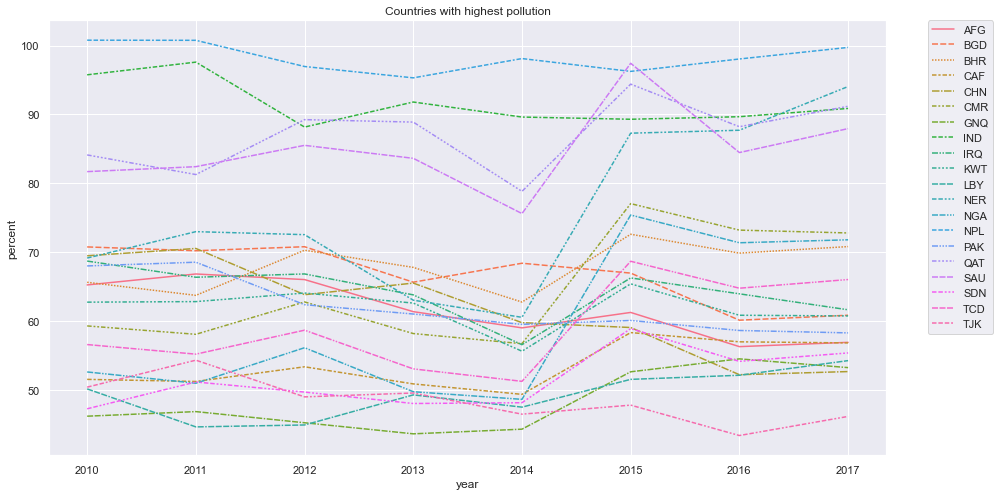

In [68]:
query_a = '''
SELECT year, percent, iso_code
FROM air_polution_pd_cleaned_transposed
WHERE  iso_code IN(
  SELECT DISTINCT iso_code 
  FROM air_polution_pd_cleaned_transposed 
  ORDER BY percent DESC
  LIMIT 20
)
ORDER BY year ASC, iso_code, percent
'''

graph_query0 = psql.sqldf(query_a)
linePlot(graph_query0)
plt.title('Countries with highest pollution')

Below is the query for the lowest polluters 

Text(0.5, 1.0, 'Countries with lowest pollution')

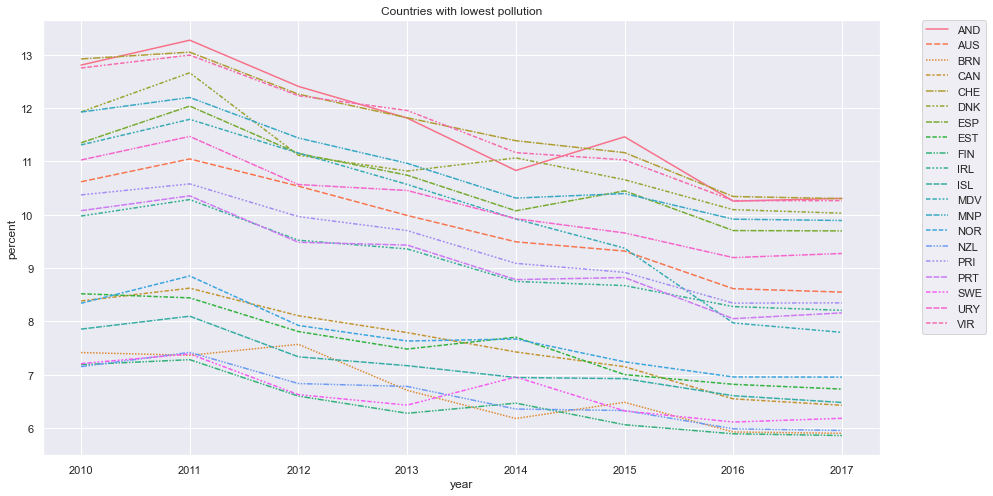

In [69]:
query_b = '''
SELECT year, percent, iso_code
FROM air_polution_pd_cleaned_transposed
WHERE  iso_code IN(
  SELECT DISTINCT iso_code 
  FROM air_polution_pd_cleaned_transposed 
  ORDER BY percent 
  LIMIT 20
)
ORDER BY year ASC, iso_code, percent
'''

graph_query0 = psql.sqldf(query_b)
linePlot(graph_query0)
plt.title('Countries with lowest pollution')

Below is the queries worst polluters at the city level

In [70]:
def cityLevelBarPlot(data_input):
  sns.set_theme(style="whitegrid")
  sns.set(rc = {'figure.figsize':(25,8)})
  sns.barplot(x ="City", y = "pollution", data=data_input )

We are picking one month in the summer and one month in the winter to see which cities are the top polluters. 

In [71]:
query1 = '''
SELECT  City, max(pm25) as pollution
FROM weather_with_pop
WHERE Date LIKE '2021-07%'
GROUP BY City
ORDER BY pm25 DESC
LIMIT 20
'''

query2 = '''
SELECT City, max(pm25) as pollution
FROM weather_with_pop
WHERE Date LIKE '2021-11%'
GROUP BY City
ORDER BY pm25 DESC
LIMIT 20
'''


graph_query1 = psql.sqldf(query1)
graph_query2 = psql.sqldf(query2)


Below is an aggregated query of the top cities with month on the x axis 

In [72]:
query3 = '''
SELECT City, max(pm25) as pollution, short_date as date
FROM weather_with_pop
WHERE City IN (
  SELECT City
  FROM weather_with_pop
  WHERE Date LIKE '2021-06%' 
  GROUP BY City
  ORDER BY pm25 DESC
  LIMIT 10
)
GROUP BY City, short_date
ORDER BY short_date, pm25 DESC 
'''

graph_query3 = psql.sqldf(query3)

Text(0.5, 1.0, 'Top pollution cities in the summer (Jun)')

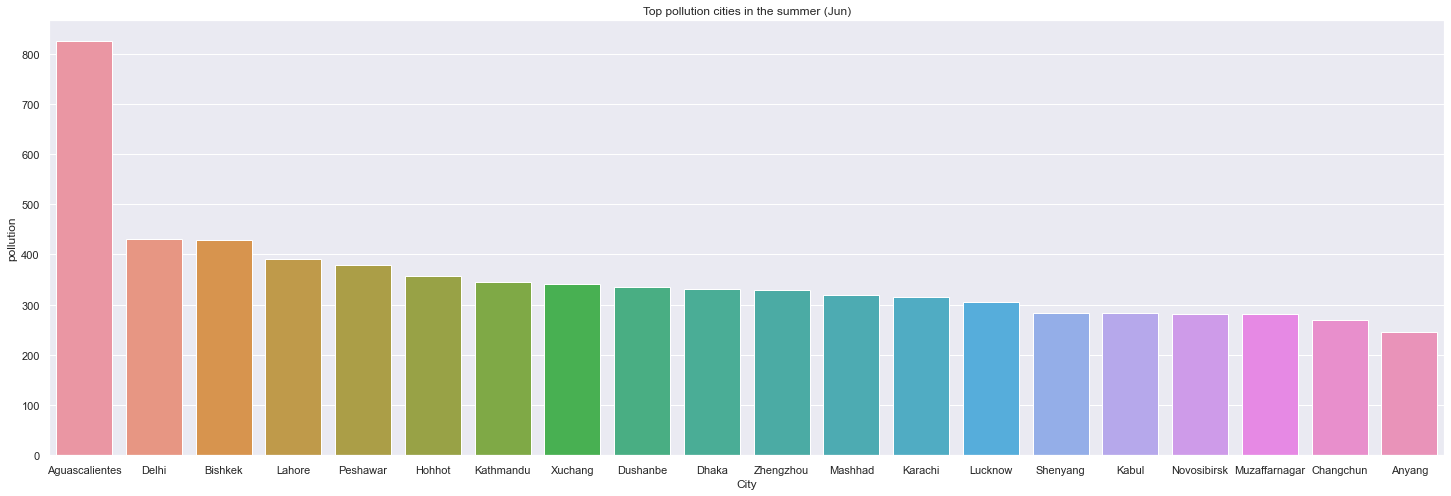

In [75]:
cityLevelBarPlot(graph_query1)
plt.title('Top pollution cities in the summer (Jun)')

Text(0.5, 1.0, 'Top pollution cities in the winter (Nov)')

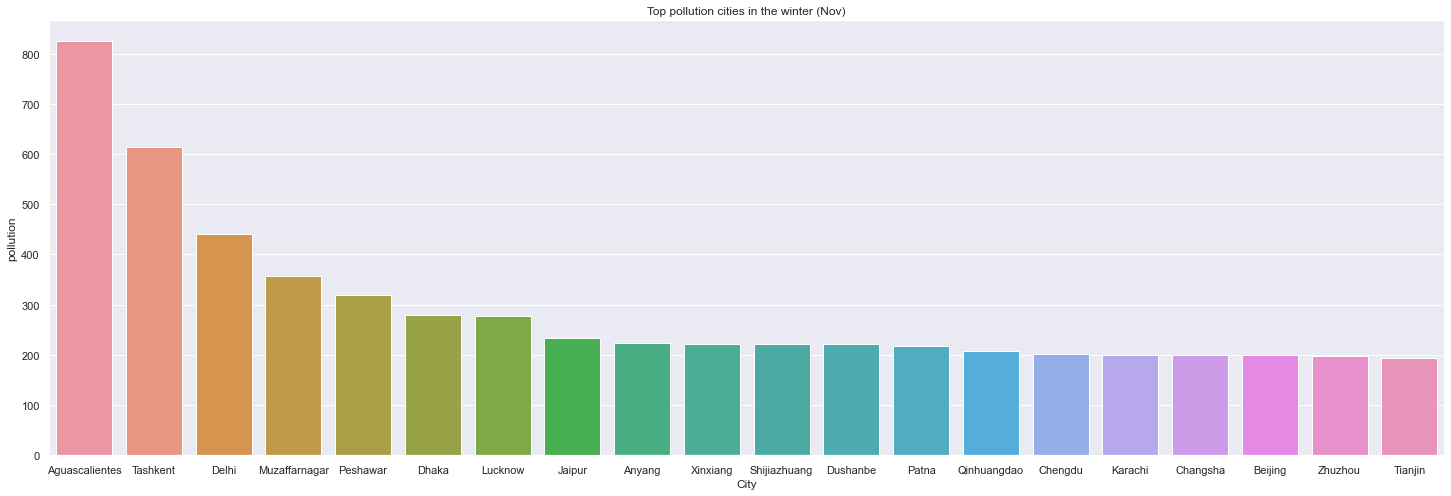

In [76]:
cityLevelBarPlot(graph_query2)
plt.title('Top pollution cities in the winter (Nov)')

Generally, we are seeing that there is a rise in pm 2.5 in the winter seasons between November to Feburary 

<AxesSubplot:xlabel='date', ylabel='pollution'>

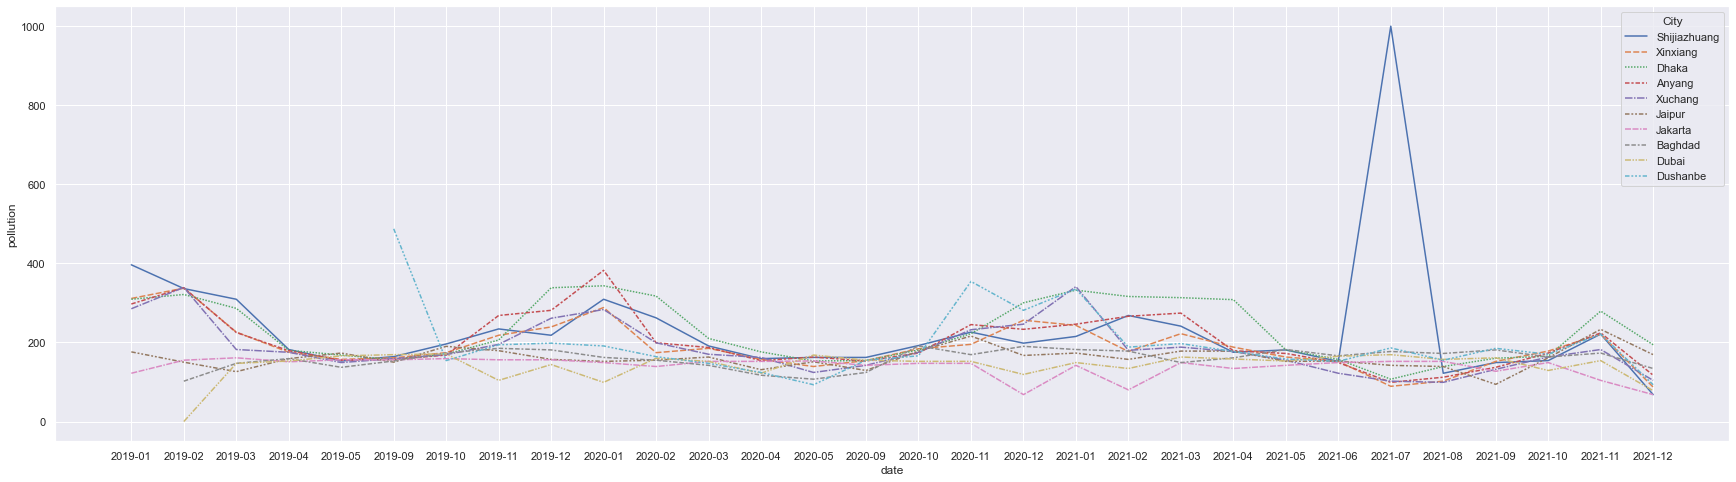

In [77]:
sns.set(rc = {'figure.figsize':(30,8)})
sns.lineplot(data=graph_query3, x="date", y="pollution", hue="City", style="City").set(title= 'Highest pollution cities seasonal trend')


training time 
accuracy 
notablity of the approach 


Graph relationship between pollution and tempature 

In [78]:
query = '''
SELECT AVG(temperature) as temperature , AVG(pm25) as pm25, short_date
FROM vaild_values_pollution
GROUP BY short_date 
'''
temp_and_pm25 = psql.sqldf(query)


Observations


*   The winter month when the tempature are lower, there is a higher rate of pollution. The immediate relationship between the pollution and tempature is inverse relationship
*   The is a gradual decrease in pollutions 
*   There is a gradual increase in highest and lowest tempature 



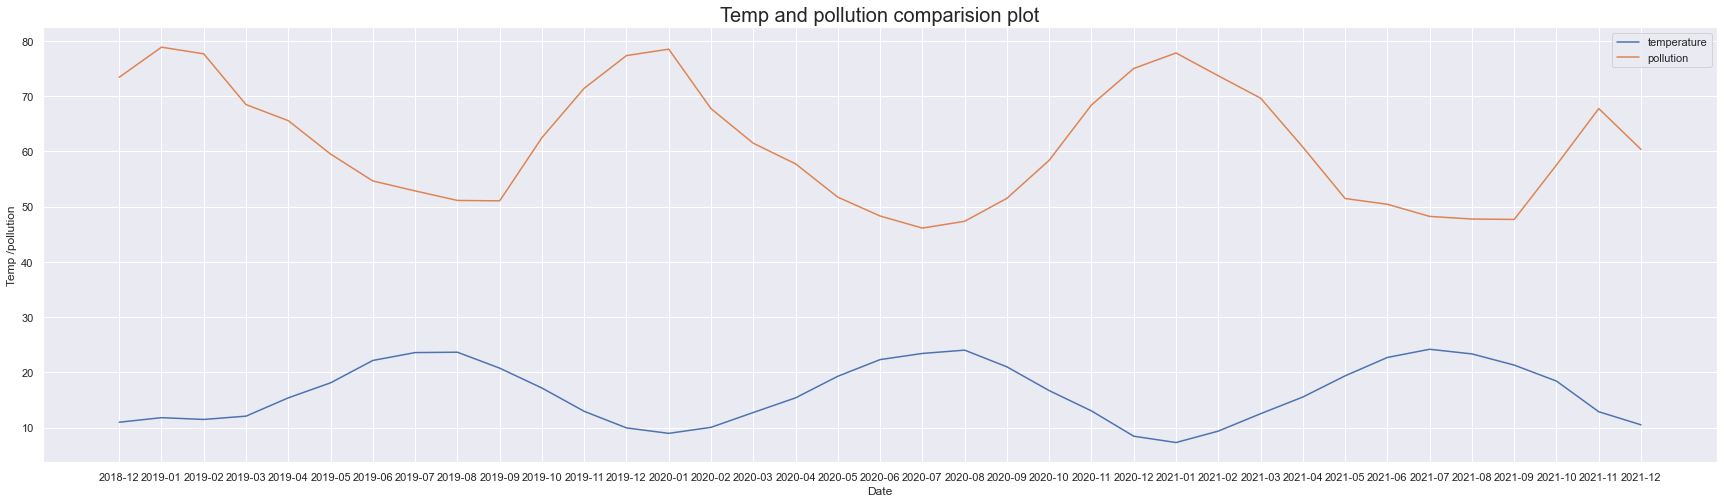

In [79]:
import matplotlib.pyplot as plt
Date =  temp_and_pm25['short_date']
temp = temp_and_pm25['temperature']
pm25 = temp_and_pm25['pm25']

plt.plot(Date, temp, label = "temperature" )
plt.plot(Date, pm25, label = "pollution" )
plt.legend()

plt.title("Temp and pollution comparision plot", fontsize = 20) # for title
plt.xlabel("Date", fontsize = 12) # label for x-axis
plt.ylabel("Temp /pollution", fontsize = 12) # label for y-axis
plt.show()

# 3 Creating Model

#### **3.1.** Correlation of Feature Variables

There will be three sets of each steps because the same process was ran acorss three set of dataset. One dataset with population, one without population, and one without popultion and with none determinsitic values dropped .  For purpose of avoiding too much info, some of the graph for dataset 3 was not plotted. 

Dataset 1: Weather pollution data with population
Dataset 2: Weather pollution data cleand and population
Dataset 3: Weather pollution data cleandvalues 

The reason we did this was because after the join with population we loose some data records. Similarly, after dropping non deterministic values we are dropping some records as well. 
* cleaned referring to having some record with non-deterministic values dropped 

First, we will take a look at the correlation matrix to remove any highly correlated features so our model can perform better. We will be using MSE and MAE to measure each of our models 

In [534]:
weather_with_pop = pd.read_csv('./Data/weather_with_pop_cleaned.csv')

<AxesSubplot:>

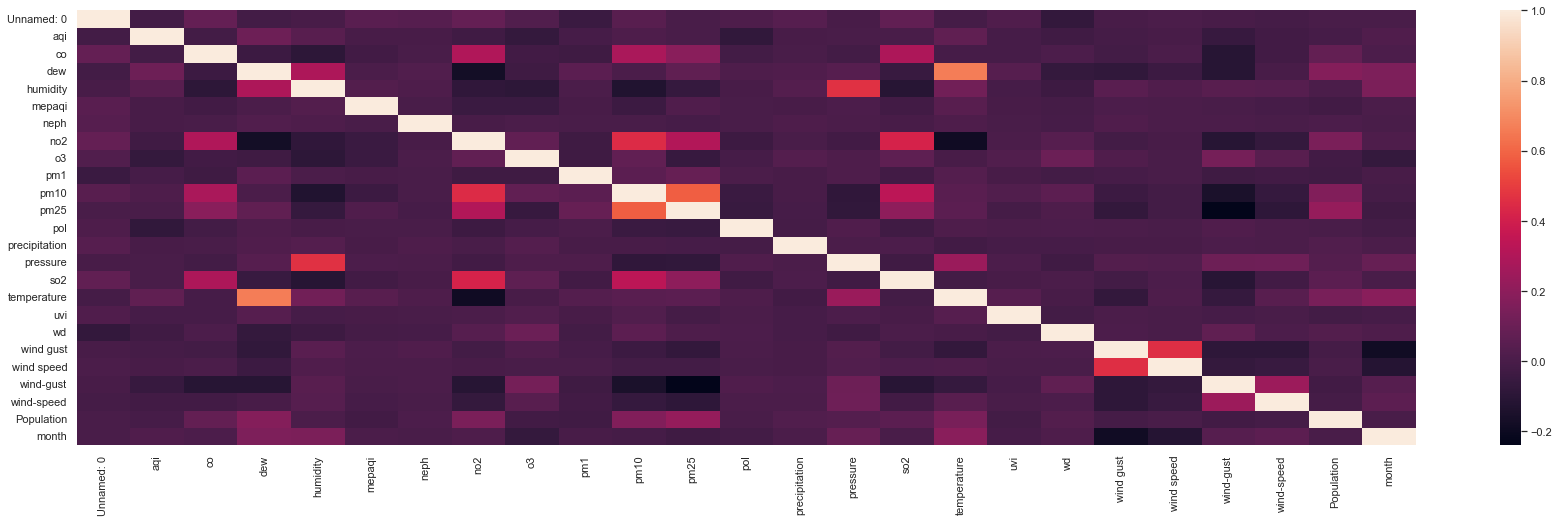

In [322]:
#Dataset 1
weather_with_pop_corr = weather_with_pop.corr()
sns.heatmap(data = weather_with_pop_corr, annot=False)

In [81]:
vaild_values_pollution = vaild_values_pollution.drop(columns = ['mepaqi'])

<AxesSubplot:>

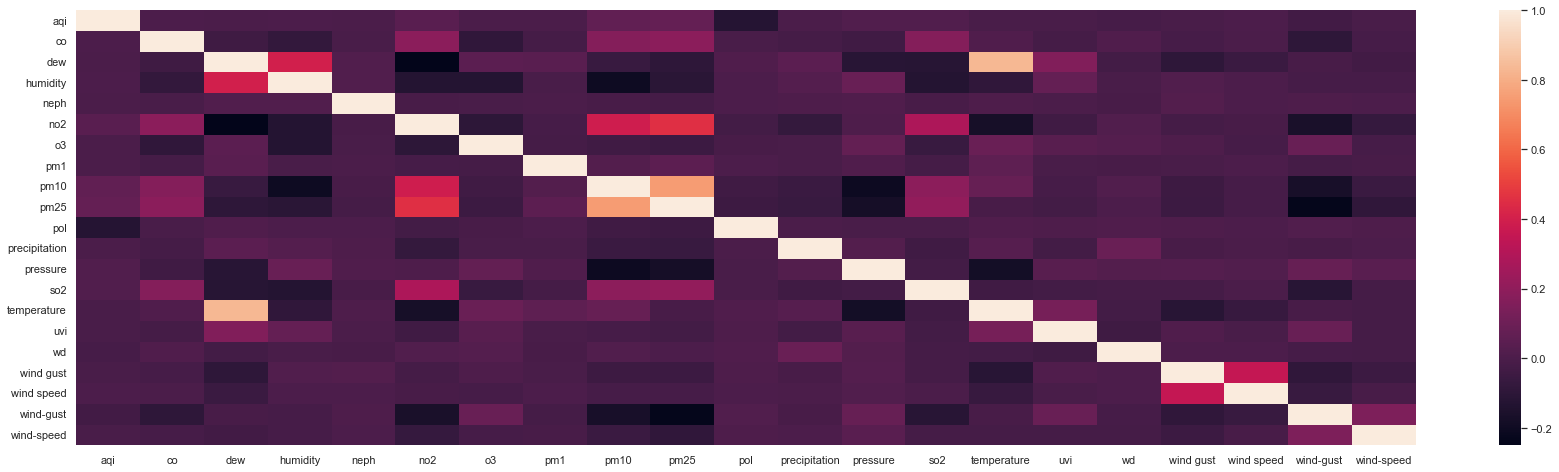

In [82]:
#Dataset 3
weather_corr = vaild_values_pollution.corr()
sns.heatmap(data = weather_corr, annot=False)

#### **3.2** Select the key columns

remove highly correlated features from the columns and keep the features we want to use in our model. For the first set of the dataset, we retained the populuation in the dataset. 

In [535]:
#Dataset 1
new_weather_df = weather_with_pop[['dew', 'pressure', 'no2', 'Population', 'wind-gust', 'so2', 'wind-speed', 'pm25', 'pm10','month', 'humidity', 'co','datetime','short_date','City','Country', 'temperature']]

#tried selecting more features 
#new_weather_df = weather_with_pop[['aqi', 'co', 'dew', 'humidity', 'neph', 'no2', 'o3', 'pm1', 'pm25', 'pol', 'precipitation', 'pressure', 'so2', 'uvi', 'wd', 'wind-gust', 'wind-speed', 'month', 'Population','datetime','short_date','City','Country', 'temperature']]



In [507]:
#Dataset 2
new_weather_df2 = weather_with_pop_small[['dew', 'pressure', 'no2', 'Population', 'wind-gust', 'so2', 'wind-speed', 'pm25', 'pm10','month', 'humidity', 'co','datetime','short_date','City','Country', 'temperature']]

In [525]:
#Dataset 3
new_weather_df3 = vaild_values_pollution[['aqi', 'co', 'dew', 'humidity', 'neph', 'no2', 'o3', 'pm10', 'pm25', 'pol', 'precipitation', 'pressure', 'so2', 'uvi', 'wd', 'wind-gust', 'wind-speed','short_date','datetime','City','Country', 'temperature']]
                                         
                                         

#### **3.2** Encode Categorical Variables using LabelEncoder

We will encode the city and country for our machine learning model. 

In [536]:
#all dataset 
%%capture
!pip install scikit-learn
from sklearn.preprocessing import LabelEncoder

el = LabelEncoder()
city_labels = el.fit_transform(new_weather_df['City'])
country_labels = el.fit_transform(new_weather_df['Country'])
short_date_labels = el.fit_transform(new_weather_df['short_date'])

city_labels2 = el.fit_transform(new_weather_df2['City'])
country_labels2 = el.fit_transform(new_weather_df2['Country'])
short_date_labels2 = el.fit_transform(new_weather_df2['short_date'])

city_labels3 = el.fit_transform(new_weather_df3['City'])
country_labels3 = el.fit_transform(new_weather_df3['Country'])
short_date_labels3 = el.fit_transform(new_weather_df3['short_date'])


In [537]:
pd.options.mode.chained_assignment = None  # default='warn'

In [538]:
#all dataset 
new_weather_df['city_labels'] = city_labels
new_weather_df['country_labels'] = country_labels
new_weather_df['short_date_labels'] = short_date_labels


new_weather_df2['city_labels'] = city_labels2
new_weather_df2['country_labels'] = country_labels2
new_weather_df2['short_date_labels'] = short_date_labels2

new_weather_df3['city_labels'] = city_labels3
new_weather_df3['country_labels'] = country_labels3
new_weather_df3['short_date_labels'] = short_date_labels3

<AxesSubplot:>

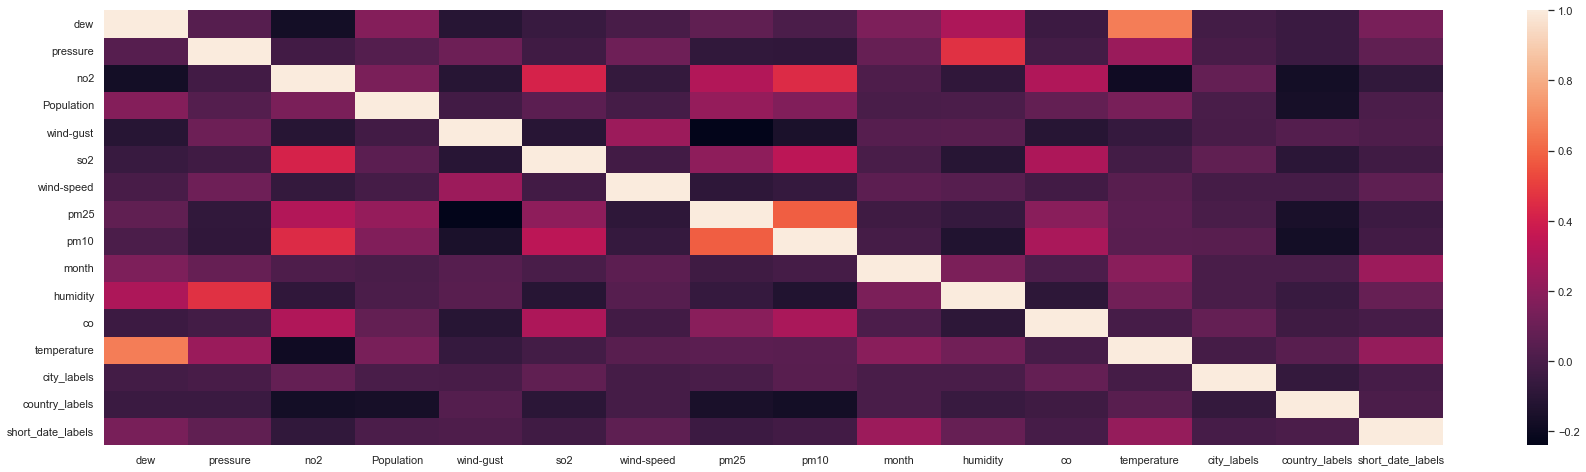

In [314]:
#Dataset 1
# updated correlation heatmap based on feature variables
updated_weather_df_corr = new_weather_df.corr()

#  heatmap for easier visualization
sns.heatmap(data = updated_weather_df_corr, annot=False)


<AxesSubplot:>

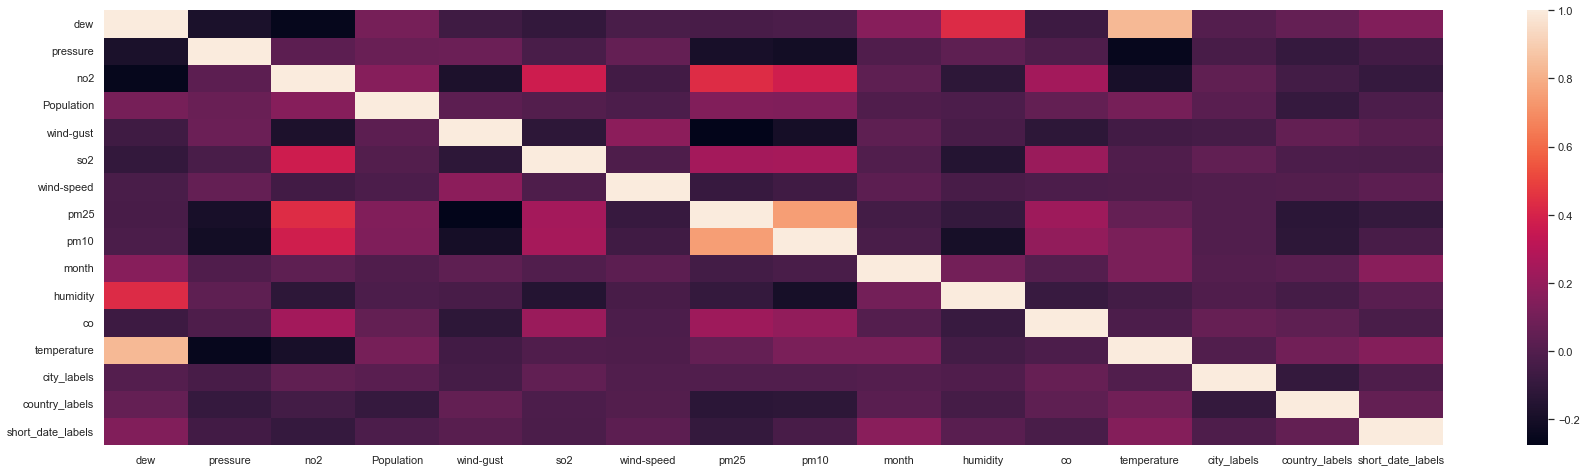

In [434]:
#Dataset 2
updated_weather_df2_cor = new_weather_df2.corr()
sns.heatmap(data = updated_weather_df2_cor, annot=False)

#### **3.4** Split into train and test

Change all data type to int for using Naive Bayes classification

In [315]:
    #new_weather_df["date_idx"] = pd.to_datetime(new_weather_df.datetime)
    #new_weather_df = new_weather_df.set_index("date_idx")
    #new_weather_df.index = new_weather_df.index.to_period("M")

### **3.5** Modelling

#### **3.5.1** Split Data into Train and Test

We are manually split our dataset by years instead of using a random split because our dataset is continous. 
- Training 2019  
- Validation 2020 
- Testing 2021

In [539]:
#Dataset 1

x_train =  new_weather_df[(new_weather_df['datetime']> '2018-12') & (new_weather_df['datetime']<= '2019-12')]

x_valid = new_weather_df[(new_weather_df['datetime']> '2019-12') & (new_weather_df['datetime']<= '2020-12')]

x_test = new_weather_df[(new_weather_df['datetime']> '2020-12') & (new_weather_df['datetime']<= '2021-12')]

y_train = x_train['temperature']
y_test = x_test['temperature']


x_train = x_train[['dew', 'pressure', 'no2', 'wind-gust', 'so2', 'pm25', 'pm10','month', 'humidity',  'co','city_labels','country_labels','short_date_labels']]
x_valid = x_valid[['dew', 'pressure', 'no2', 'wind-gust', 'so2', 'pm25', 'pm10','month', 'humidity',  'co','city_labels','country_labels','short_date_labels']]
x_test = x_test[['dew', 'pressure', 'no2', 'wind-gust', 'so2', 'pm25', 'pm10','month', 'humidity',  'co','city_labels','country_labels','short_date_labels']]

#tried selecting different set of features but the outcome was not good 
#x_train = x_train[['aqi', 'co', 'dew', 'humidity', 'neph', 'no2', 'o3', 'pm1', 'pm25', 'pol', 'precipitation', 'pressure', 'so2', 'uvi', 'wd', 'wind-gust', 'wind-speed', 'month', 'Population','city_labels','country_labels','short_date_labels']]
#x_valid = x_valid[['aqi', 'co', 'dew', 'humidity', 'neph', 'no2', 'o3', 'pm1', 'pm25', 'pol', 'precipitation', 'pressure', 'so2', 'uvi', 'wd', 'wind-gust', 'wind-speed', 'month', 'Population','city_labels','country_labels','short_date_labels']]
#x_test = x_test[['aqi', 'co', 'dew', 'humidity', 'neph', 'no2', 'o3', 'pm1', 'pm25', 'pol', 'precipitation', 'pressure', 'so2', 'uvi', 'wd', 'wind-gust', 'wind-speed', 'month', 'Population','city_labels','country_labels','short_date_labels']]


In [506]:
#Dataset 2

x_train2 =  new_weather_df2[(new_weather_df2['datetime']> '2018-12') & (new_weather_df2['datetime']<= '2019-12')]

x_valid2 = new_weather_df2[(new_weather_df2['datetime']> '2019-12') & (new_weather_df2['datetime']<= '2020-12')]

x_test2 = new_weather_df2[(new_weather_df2['datetime']> '2020-12') & (new_weather_df2['datetime']<= '2021-12')]

y_train2 = x_train2['temperature']
y_test2 = x_test2['temperature']


x_train2 = x_train2[['dew', 'pressure', 'no2', 'wind-gust', 'so2', 'pm25', 'pm10','month', 'humidity',  'co','city_labels', 'country_labels','short_date_labels']]
x_valid2 = x_valid2[['dew', 'pressure', 'no2', 'wind-gust', 'so2', 'pm25', 'pm10','month', 'humidity',  'co','city_labels', 'country_labels','short_date_labels']]
x_test2 = x_test2[['dew', 'pressure', 'no2', 'wind-gust', 'so2', 'pm25', 'pm10','month', 'humidity',  'co','city_labels', 'country_labels','short_date_labels']]

In [530]:
#Dataset 3
x_train3 =  new_weather_df3[(new_weather_df3['datetime']> '2018-12') & (new_weather_df3['datetime']<= '2019-12')]

x_valid3 = new_weather_df3[(new_weather_df3['datetime']> '2019-12') & (new_weather_df3['datetime']<= '2020-12')]

x_test3 = new_weather_df3[(new_weather_df3['datetime']> '2020-12') & (new_weather_df3['datetime']<= '2021-12')]

y_train3 = x_train3['temperature']
y_test3 = x_test3['temperature']

x_train3 = x_train3[['dew', 'pressure', 'no2', 'wind-gust', 'so2', 'pm25', 'pm10', 'humidity',  'co','city_labels', 'country_labels','short_date_labels']]
x_valid3 = x_valid3[['dew', 'pressure', 'no2', 'wind-gust', 'so2', 'pm25', 'pm10', 'humidity',  'co','city_labels', 'country_labels','short_date_labels']]
x_test3 = x_test3[['dew', 'pressure', 'no2', 'wind-gust', 'so2', 'pm25', 'pm10', 'humidity',  'co','city_labels', 'country_labels','short_date_labels']]
                  

We are casting all our values into int to prepare the data for input into the model. 

In [540]:
#Dataset 1
x_train = x_train.astype('int64')
x_valid = x_valid.astype('int64')
x_test = x_test.astype('int64')
y_train = y_train.astype('int64')
y_test = y_test.astype('int64')

In [475]:
#Dataset 2
x_train2 = x_train2.astype('int64')
x_valid2 = x_valid2.astype('int64')
x_test2 = x_test2.astype('int64')
y_train2 = y_train2.astype('int64')
y_test2 = y_test2.astype('int64')

In [531]:
#Dataset 3
%%capture
x_train3 = x_train3.astype('int64')
x_valid3 = x_valid3.astype('int64')
x_test3 = x_test3.astype('int64')
y_train3 = y_train3.astype('int64')
y_test3 = y_test3.astype('int64')

#### **3.5.2**  SVM Regression model

After we prepred our data, we will run our first model with Suppor Vector regression model to see the performance. We will run this across all the cities and see how well we can predict the weather based on the features we selected from above. 

First, we will define the SVM SVR model. Then we will call fit and predict with the model. 

In [541]:
from sklearn import svm
#Dataset 1
X = x_train
y = y_train
regr = svm.SVR()
regr.fit(X, y)

y_pred = regr.predict(x_test)

In [542]:
#Dataset 1
score = regr.score(x_train, y_train)
print("R-squared:", score) 

R-squared: 0.36319894063613045


In [543]:
#Dataset 1

mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0)) 

MSE:  47.09477740043956
RMSE:  23.54738870021978


In [544]:
#Dataset 1
mae = mean_absolute_error(y_test,y_pred) 
print("MAE: ", mae)

MAE:  5.269914375362036


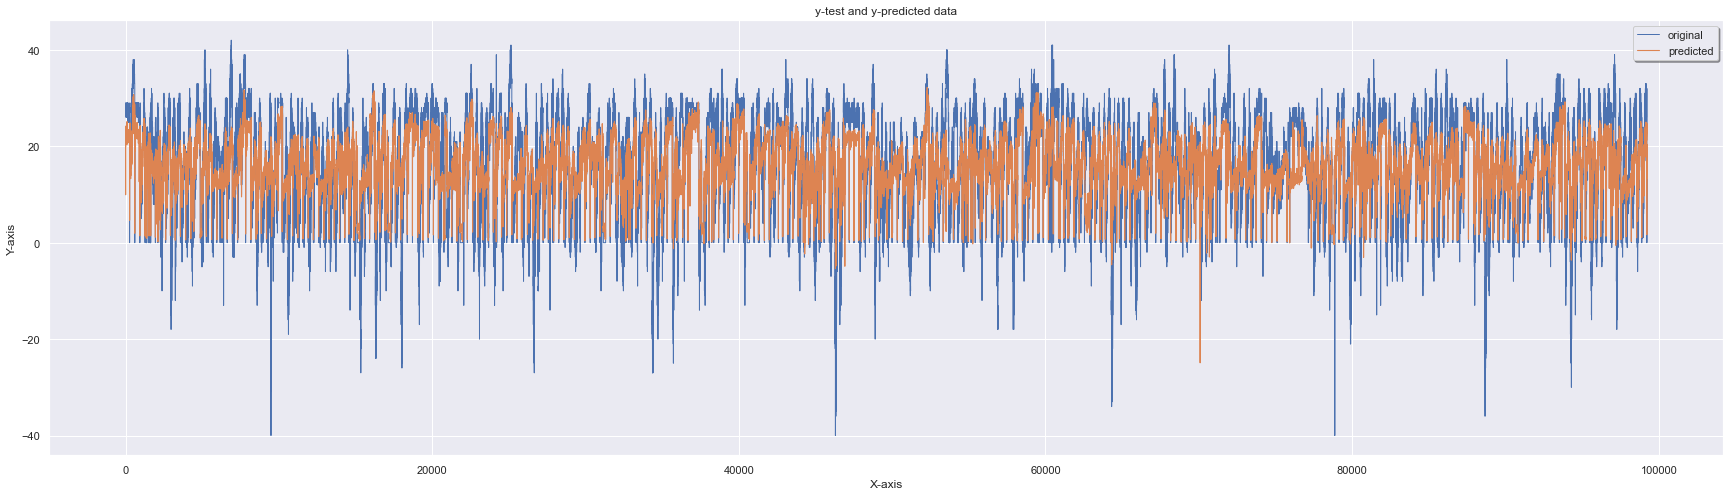

In [545]:
#Dataset 1
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, y_pred, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('Samples')
plt.ylabel('Temp')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

Since we have multiple cities, we are graphing the prediction data and actual data below to see overall closeness in our prediction. 

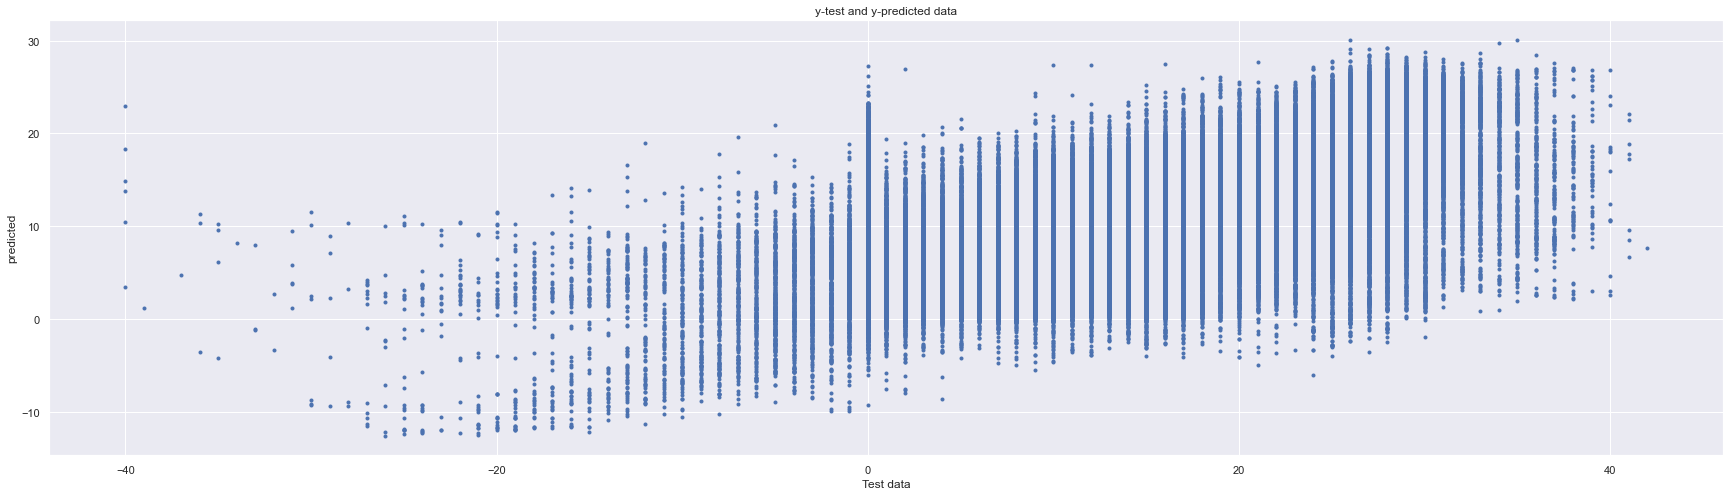

In [556]:
x_ax = range(len(y_test))

plt.plot(y_test, y_pred,".")
plt.title("y-test and y-predicted data")
plt.xlabel('Test data')
plt.ylabel('predicted')
plt.grid(True)
plt.show()

In [481]:
#Dataset 2
X2 = x_train2
y2 = y_train2
regr2 = svm.SVR()
regr2.fit(X2, y2)


SVR()

In [482]:
#Dataset 2
y_pred2 = regr2.predict(x_test2)

In [483]:
#Dataset 3
score2 = regr2.score(x_train2, y_train2)
print("R-squared:", score2) 


R-squared: 0.5282809798127623


In [484]:
#Dataset 2
mse2 = mean_squared_error(y_test2, y_pred2)
print("MSE: ", mse2)
print("RMSE: ", mse2*(1/2.0)) 

MSE:  47.69890174936186
RMSE:  23.84945087468093


In [485]:
#Dataset 2
mae2 = mean_absolute_error(y_test2,y_pred2) 
print("MAE: ", mae2)

MAE:  5.423771776804181


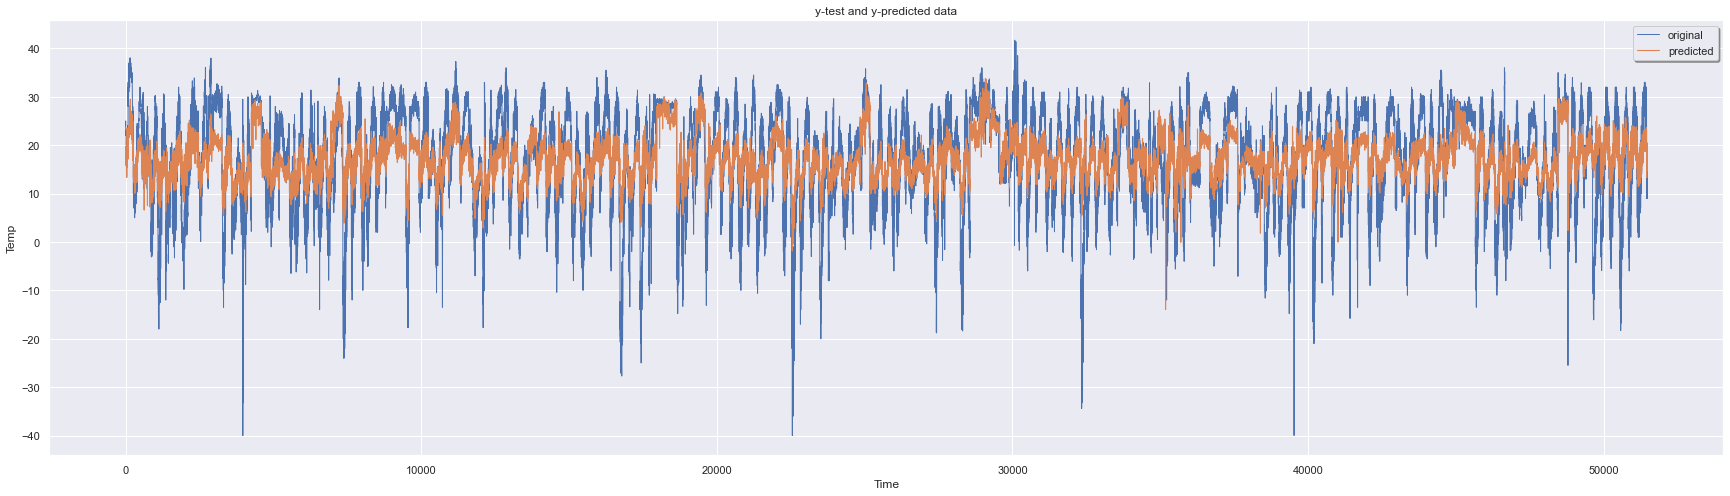

In [557]:
#Dataset 2
x_ax = range(len(y_test2))
plt.plot(x_ax, y_test2, linewidth=1, label="original")
plt.plot(x_ax, y_pred2, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('Sample')
plt.ylabel('Temp')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

Similar to above, we are graphing the prediction data and actual data below to see overall closeness in our prediction. 

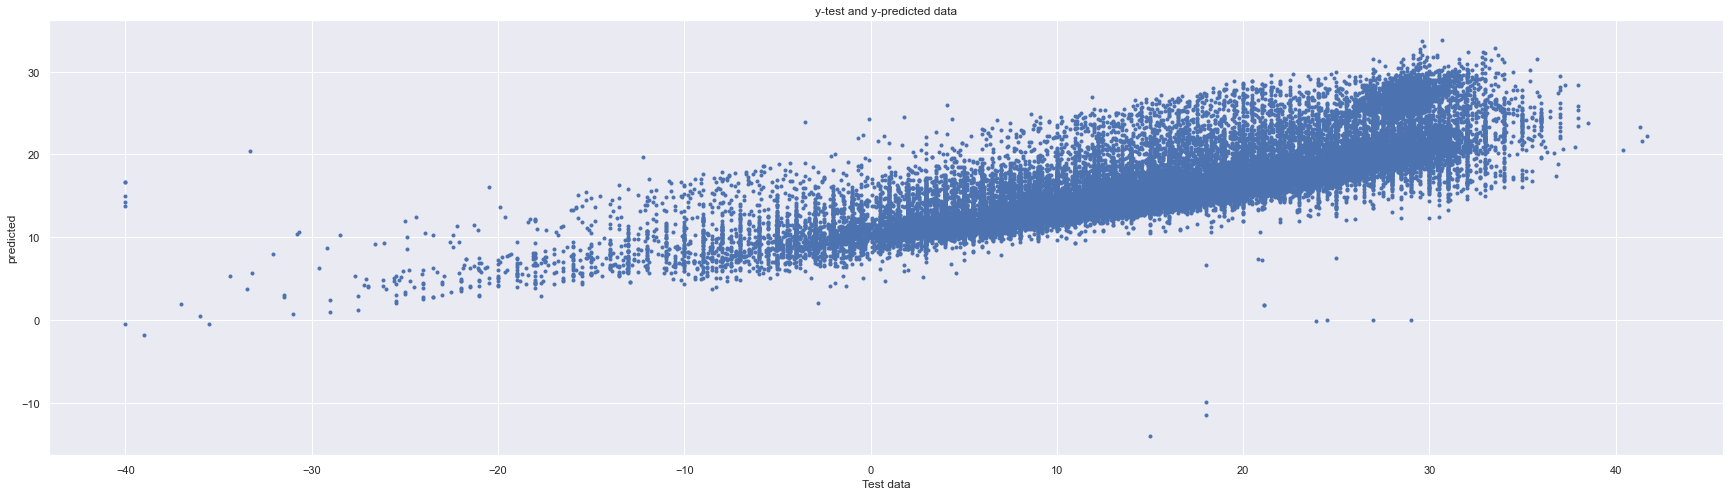

In [558]:
x_ax = range(len(y_test2))

plt.plot(y_test2, y_pred2,".")
plt.title("y-test and y-predicted data")
plt.xlabel('Test data')
plt.ylabel('predicted')
plt.grid(True)
plt.show()

In [532]:
#Dataset 3
X3 = x_train3
y3 = y_train3
regr3 = svm.SVR()
regr3.fit(X3, y3)
y_pred3 = regr3.predict(x_test3)
score3 = regr3.score(x_train3, y_train3)
print("R-squared:", score3) 
mse3 = mean_squared_error(y_test3, y_pred3)
print("MSE: ", mse3)
print("RMSE: ", mse3*(1/2.0)) 
mae3 = mean_absolute_error(y_test3,y_pred3) 
print("MAE: ", mae3)

R-squared: 0.7443903759146976
MSE:  19.350065966613617
RMSE:  9.675032983306808
MAE:  3.2456576760914166


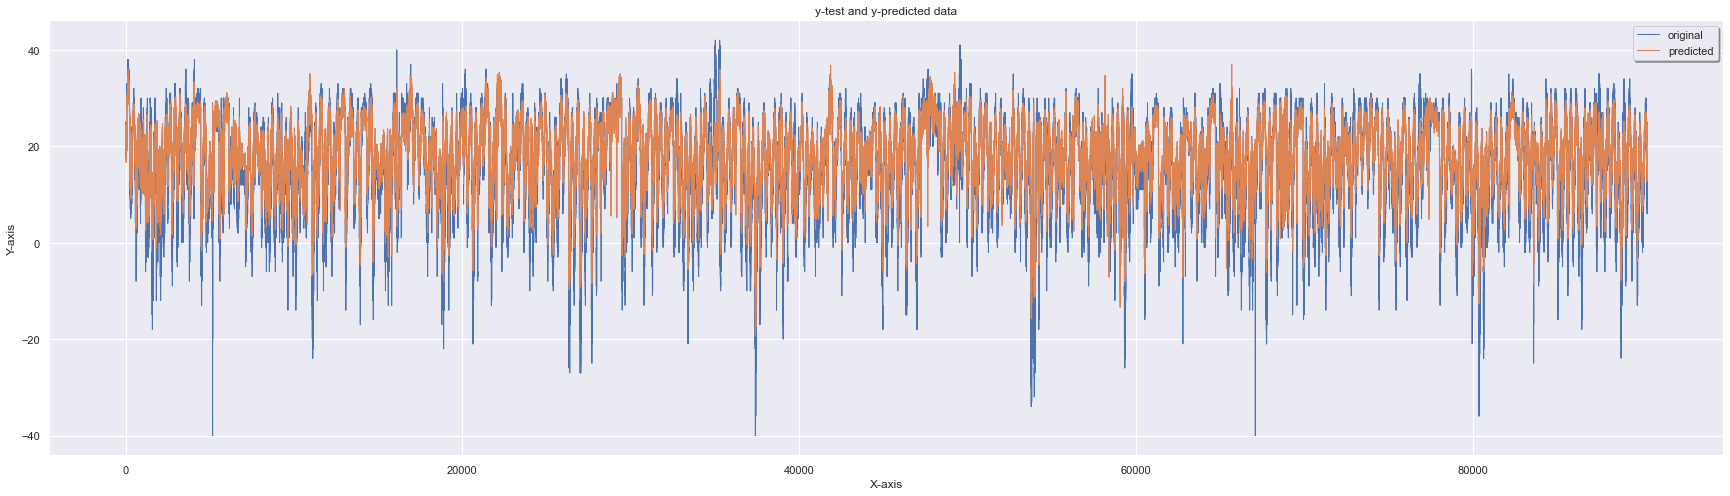

In [533]:
#Dataset 3
x_ax = range(len(y_test3))
plt.plot(x_ax, y_test3, linewidth=1, label="original")
plt.plot(x_ax, y_pred3, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('Samples')
plt.ylabel('Temp')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

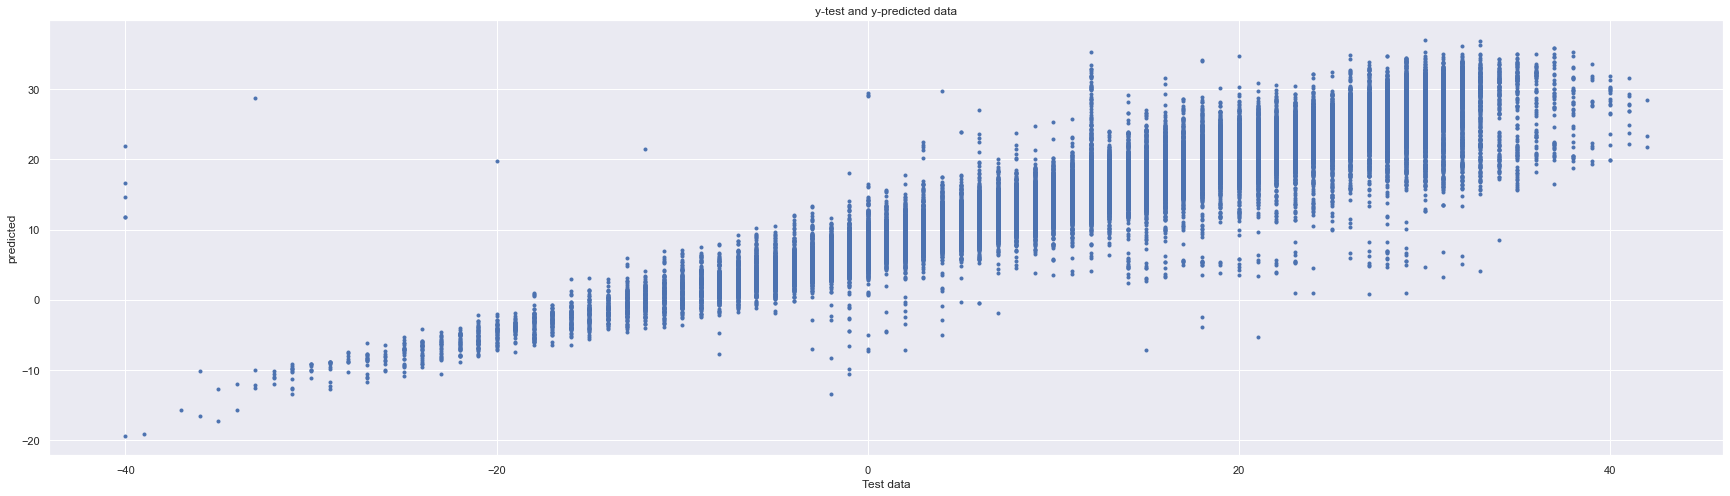

In [559]:
x_ax = range(len(y_test3))

plt.plot(y_test3, y_pred3,".")
plt.title("y-test and y-predicted data")
plt.xlabel('Test data')
plt.ylabel('predicted')
plt.grid(True)
plt.show()

#### **3.5.3** Dimensionality Reduction with PCA

Next, we will try to reduce the number of features by running standard scaler with PCA. This will help with our model performance by removing correlated features. 

(65724, 13)
[[-4.03175695e-02 -1.31926006e-01  4.29377039e-01 -2.08189770e-01
   3.93870214e-01  4.31670243e-01  4.90728964e-01 -1.52984367e-01
  -1.52913667e-01  2.31434817e-01  6.62268762e-02 -2.02659231e-01
  -1.58647082e-01]
 [ 3.09751282e-01  1.73376208e-01  8.20792240e-02 -1.47653873e-01
   1.05706267e-01  1.24485646e-01  1.17724077e-01  5.96806516e-01
   2.85283737e-01  9.83909229e-02  1.76595747e-02 -1.01997618e-01
   5.89037981e-01]
 [-2.04371084e-02 -5.86758568e-01 -5.24749264e-02 -1.75289235e-02
   7.17415765e-02 -6.56635214e-02  2.76820472e-02  2.47576676e-01
  -5.53099711e-01  7.56829845e-02 -1.44866466e-01  4.22520497e-01
   2.63741732e-01]
 [-5.61287337e-01  1.90284485e-01  3.27250755e-01  4.12019995e-01
   2.80653970e-01 -3.60544766e-01 -7.91988812e-02  1.61335483e-01
  -6.83896730e-02  2.02933716e-01  2.40198888e-01 -4.15037568e-02
   1.59864689e-01]
 [-1.59954291e-01  1.52478575e-01  1.15587844e-01  2.20424412e-01
   3.05495289e-02  5.12907509e-02  1.10390561e-01  2.3

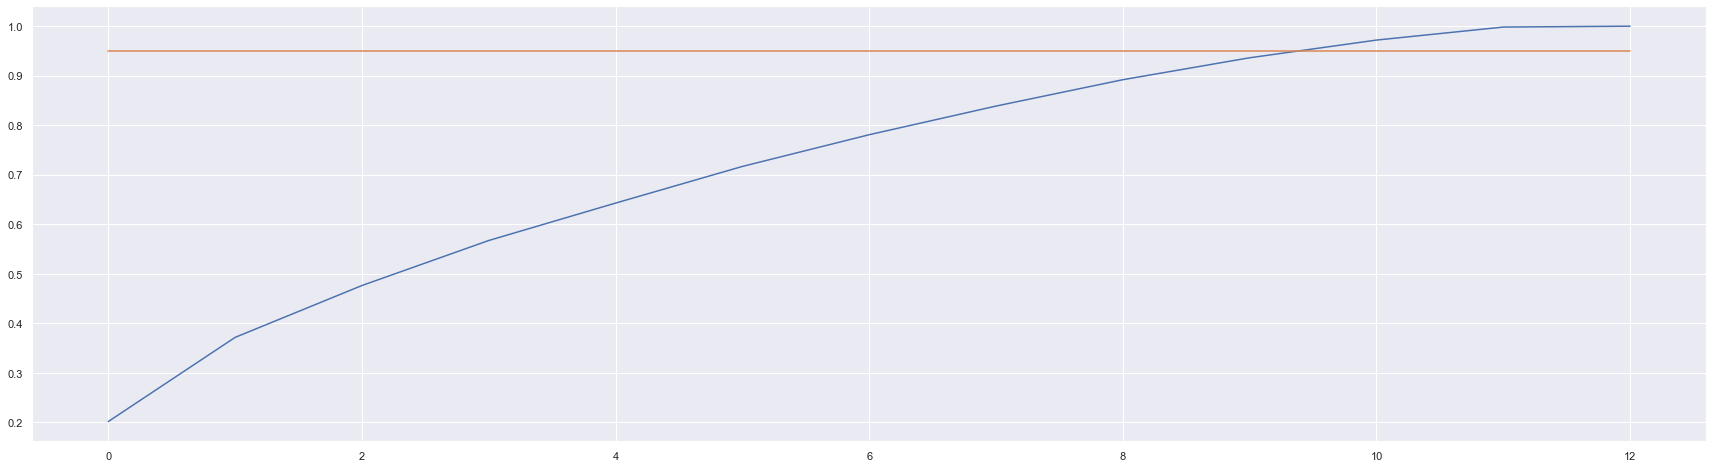

In [546]:
# TO DO PCA

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)

pca = PCA(n_components = 13)
pca_x_train = pca.fit_transform(scaled_x_train)


print(pca_x_train.shape)

print(pca.components_)
# TO DO plot for explained variance
pca.explained_variance_ratio_
plt.plot(np.arange(0, 13), np.cumsum(pca.explained_variance_ratio_))
plt.plot(np.arange(0, 13), [0.95]*13)
plt.show()

(66007, 15)
[[-8.89424033e-02 -5.61643071e-02  3.95730714e-01 -2.74540781e-01
   3.67969519e-01  5.04822810e-01  5.00424866e-01 -1.36891223e-01
  -2.02248592e-01  1.42124445e-01  4.56665571e-02 -1.25256084e-01
  -1.36634988e-01]
 [ 3.07226535e-01 -2.56488507e-01  3.93302336e-02 -1.92313157e-01
   1.23391114e-01  8.25492505e-02  9.27612586e-02  6.12672945e-01
   1.25218855e-01  7.65732769e-02  5.00335940e-02  8.33876520e-02
   6.03557504e-01]
 [-5.95416259e-01  1.59512489e-01  1.87977221e-01  2.61846611e-01
   1.17687139e-01 -1.85177304e-01 -6.19031748e-02  2.62568167e-01
  -5.54259262e-01  9.61256872e-03  3.64825519e-02  3.70880528e-02
   2.91922913e-01]
 [ 5.52060521e-02  1.67837943e-01  1.23812641e-01  4.72435353e-02
   1.58889036e-01 -5.32614549e-02 -6.89084941e-02 -4.41951074e-02
   8.32020790e-02  5.74407256e-01 -4.34110482e-01  6.22539291e-01
  -5.96970477e-02]
 [ 1.58739230e-02 -5.98935204e-01 -2.24131676e-01 -1.82596122e-02
   3.49180265e-02 -6.35000571e-02 -5.12950520e-02 -1.4

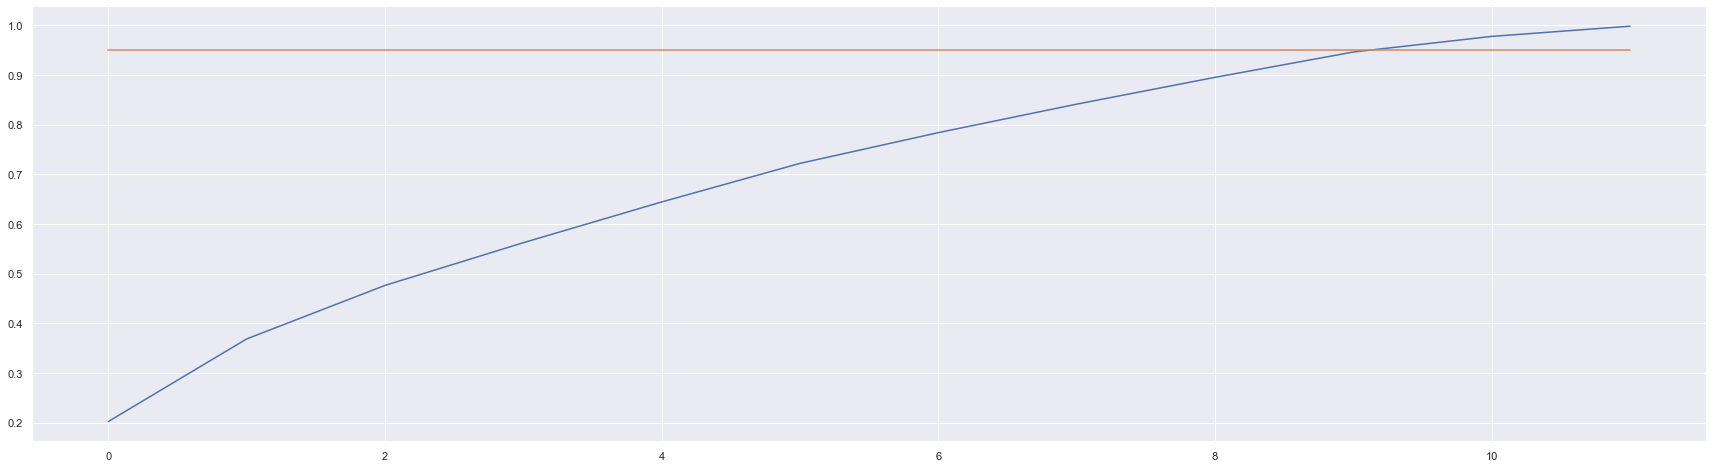

In [463]:
scaler2 = StandardScaler()
scaled_x_train2 = scaler2.fit_transform(x_train2)
scaled_x_test2 = scaler2.transform(x_test2)

pca2 = PCA(n_components = 12)
pca_x_train2 = pca2.fit_transform(scaled_x_train2)


print(pca_x_train2.shape)

print(pca2.components_)
# TO DO plot for explained variance
pca2.explained_variance_ratio_
plt.plot(np.arange(0, 12), np.cumsum(pca2.explained_variance_ratio_))
plt.plot(np.arange(0, 12), [0.95]*12)
plt.show()

In [461]:
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.2020599  0.16631373 0.10780889 0.08603898 0.08206443 0.0776998
 0.06190134 0.05737699 0.05398031 0.05101586 0.03141358 0.0205605 ]


In [547]:
pca = PCA(n_components=12 ) # TODO update this number
x_train_pca = pca.fit_transform(scaled_x_train)
x_test_pca  = pca.transform(scaled_x_test)
x_train = x_train_pca
x_test = x_test_pca

In [464]:
pca2 = PCA(n_components=10 ) # TODO update this number
x_train_pca2 = pca2.fit_transform(scaled_x_train2)
x_test_pca2  = pca2.transform(scaled_x_test2)
x_train2 = x_train_pca2
x_test2 = x_test_pca2

In [ ]:
scaler3 = StandardScaler()
scaled_x_train3 = scaler3.fit_transform(x_train2)
scaled_x_test3 = scaler3.transform(x_test2)

pca3 = PCA(n_components = 12)
pca_x_train3 = pca3.fit_transform(scaled_x_train2)


print(pca_x_train3.shape)

print(pca3.components_)
# TO DO plot for explained variance
pca3.explained_variance_ratio_
plt.plot(np.arange(0, 12), np.cumsum(pca3.explained_variance_ratio_))
plt.plot(np.arange(0, 12), [0.95]*12)
plt.show()

In [ ]:
pca3 = PCA(n_components=10 ) # TODO update this number
x_train_pca3 = pca3.fit_transform(scaled_x_train3)
x_test_pca3  = pca3.transform(scaled_x_test3)
x_train3 = x_train_pca3
x_test3 = x_test_pca3

Reducing the PCA to 2 and plotting the result to see the outcome 

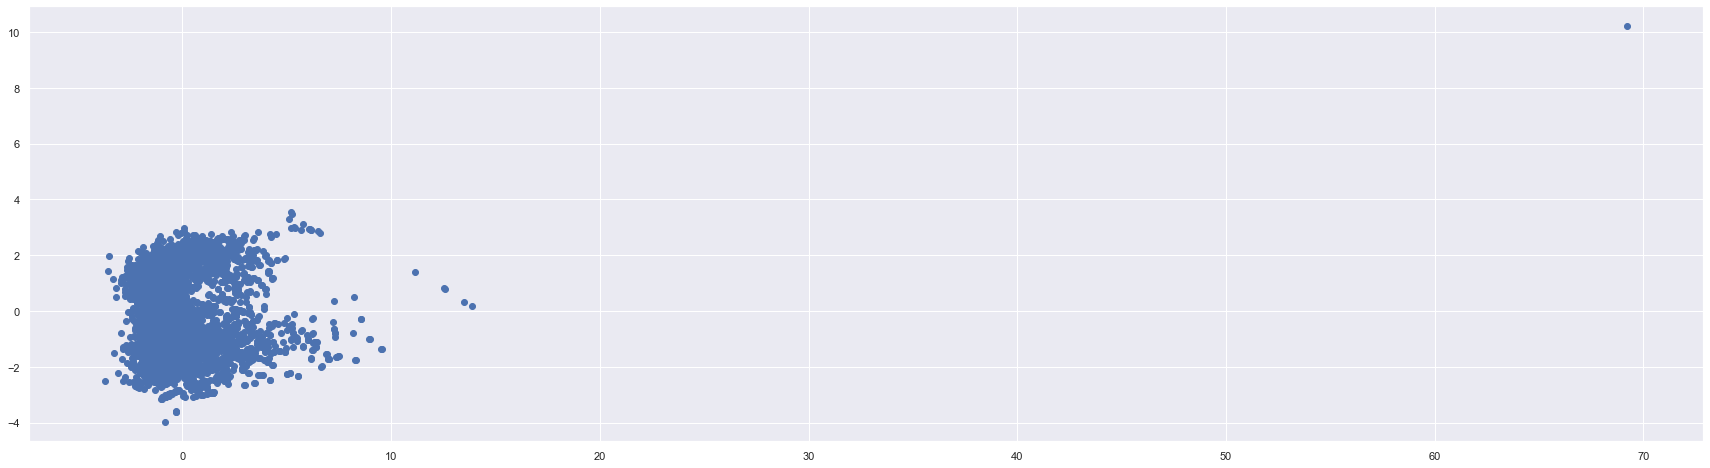

In [169]:
# visualize 2 components of PCA
pca_plot = PCA(n_components=2)
comp = pca_plot.fit_transform(x_train_pca)
data = np.transpose(np.array(comp))
plt.scatter(data[0][0:5000], data[1][0:5000])

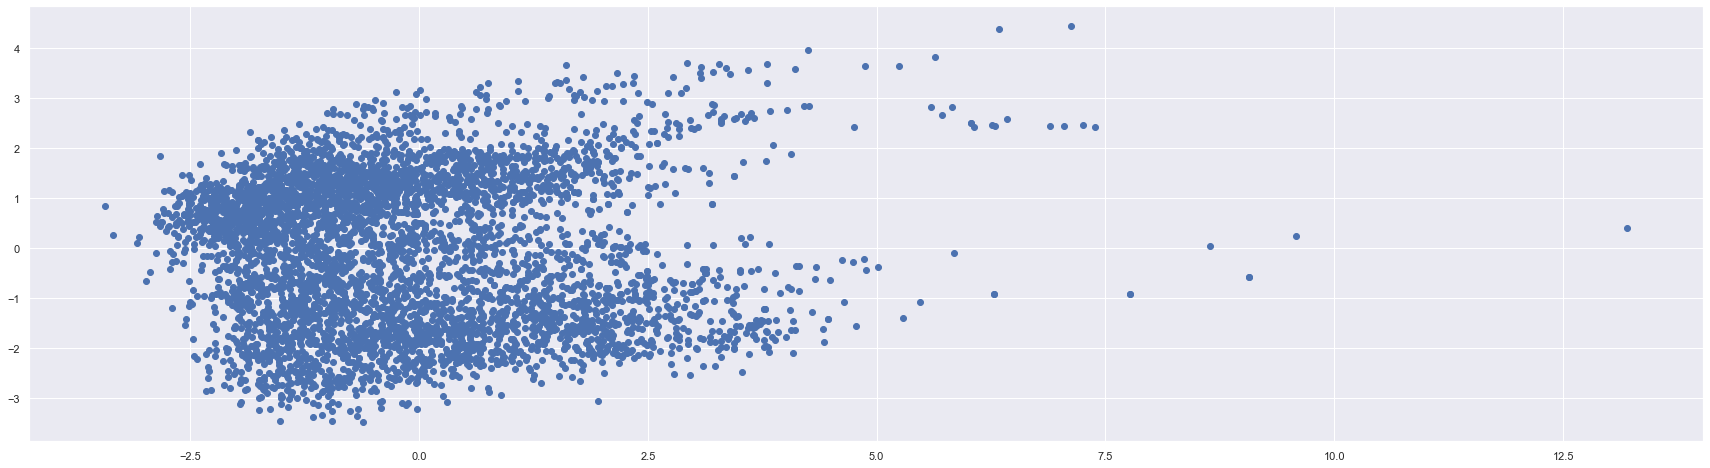

In [489]:
# visualize 2 components of PCA
pca_plot = PCA(n_components=2)
comp = pca_plot.fit_transform(x_train_pca2)
data = np.transpose(np.array(comp))
plt.scatter(data[0][0:5000], data[1][0:5000])

#### 3.5.4 Regressor Random Forest

We will use the results from PCA to fit into a regressor random forest model. The Random Forest Model, will help use optimize our reesults. Similar, to above, we will first define the model, fit then predict. 

In [193]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.preprocessing import scale
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

#from sklearn.grid_search import GridSearchCV


In [548]:
#use this 

rr = RandomForestRegressor(n_jobs =2, verbose =1, criterion="absolute_error")
rr.fit(x_train, y_train)


print(rr.predict([[0, 0, 0, 0,0,0,0,0,0,0,0,0]]))

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed: 101.7min
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed: 221.9min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.2s


[15.64]


[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.7s finished


In [549]:

score = rr.score(x_train_pca, y_train)
print("R-squared:", score) 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    2.0s


R-squared: 0.9839314134466576


[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    3.3s finished


In [550]:

# use mean absolute error 

y_pred = rr.predict(x_test_pca)

mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0)) 


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.3s


MSE:  74.14629461081616
RMSE:  37.07314730540808


[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.6s finished


In [551]:
mae = mean_absolute_error(y_test,y_pred) 
print("MAE: ", mae)

MAE:  6.79127137085806


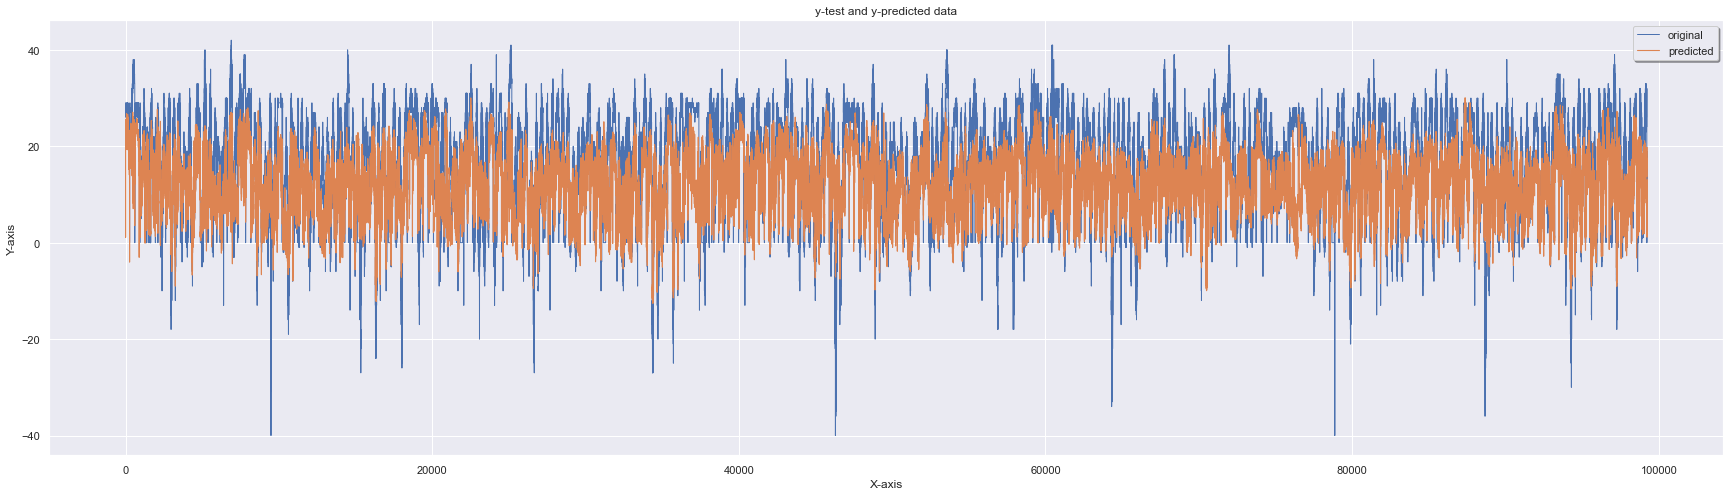

In [552]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, y_pred, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

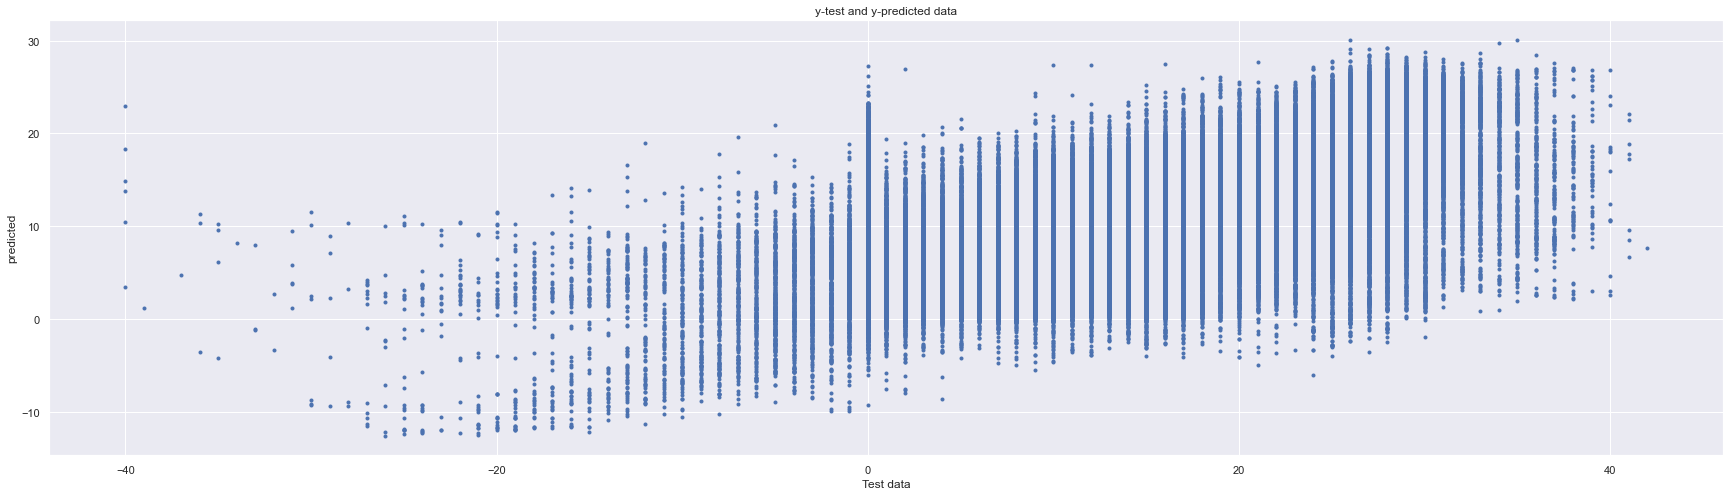

In [560]:
x_ax = range(len(y_test))

plt.plot(y_test, y_pred,".")
plt.title("y-test and y-predicted data")
plt.xlabel('Test data')
plt.ylabel('predicted')
plt.grid(True)
plt.show()

In [413]:
rr2 = RandomForestRegressor(n_jobs =2, verbose =1, criterion="absolute_error")
rr2.fit(x_train2, y_train2)

print(rr.predict([[0, 0, 0, 0,0,0,0,0,0,0,0,0]]))

score2 = rr2.score(x_train2, y_train2)
print("R-squared:", score2) 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed: 132.8min
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed: 251.7min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


[16.25]


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.8s


R-squared: 0.9840928931679778


[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    1.4s finished


In [414]:

y_pred2 = rr2.predict(x_test2)

mse2 = mean_squared_error(y_test2, y_pred2)
print("MSE: ", mse2)
print("RMSE: ", mse2*(1/2.0)) 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.3s


MSE:  39.36953923046278
RMSE:  19.68476961523139


[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.6s finished


In [415]:
mae2 = mean_absolute_error(y_test2,y_pred2) 
print("MAE: ", mae2)

MAE:  5.1438415997167075


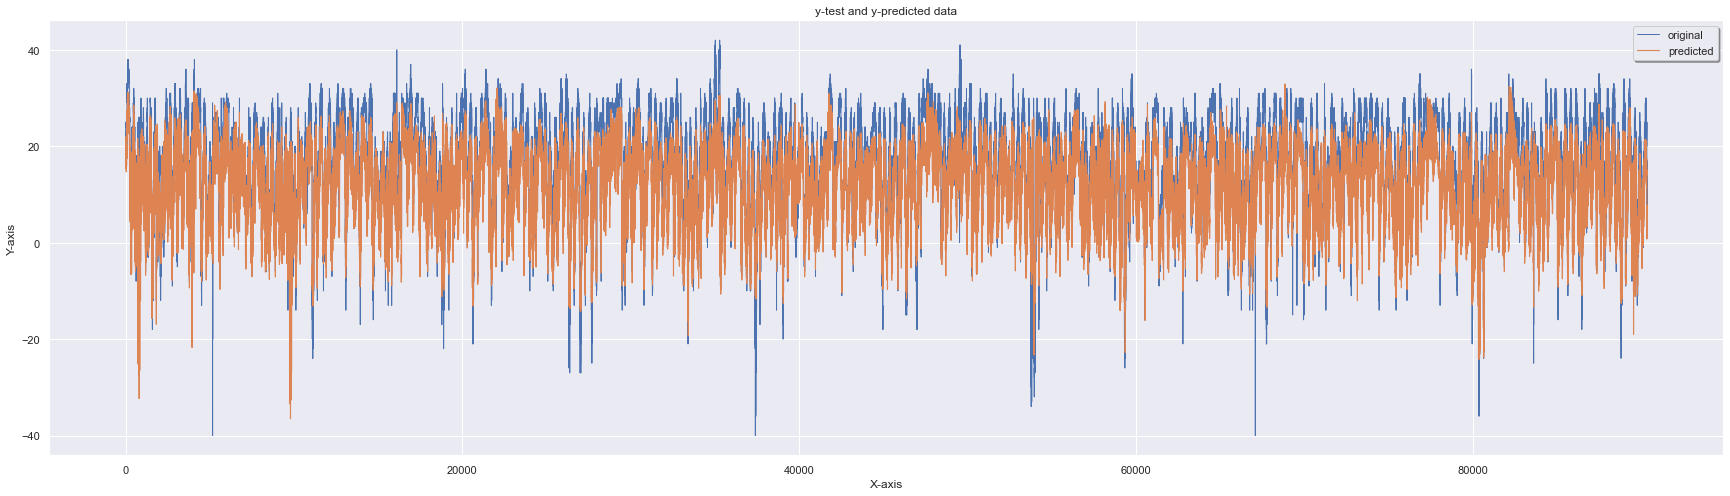

In [416]:
x_ax = range(len(y_test2))
plt.plot(x_ax, y_test2, linewidth=1, label="original")
plt.plot(x_ax, y_pred2, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

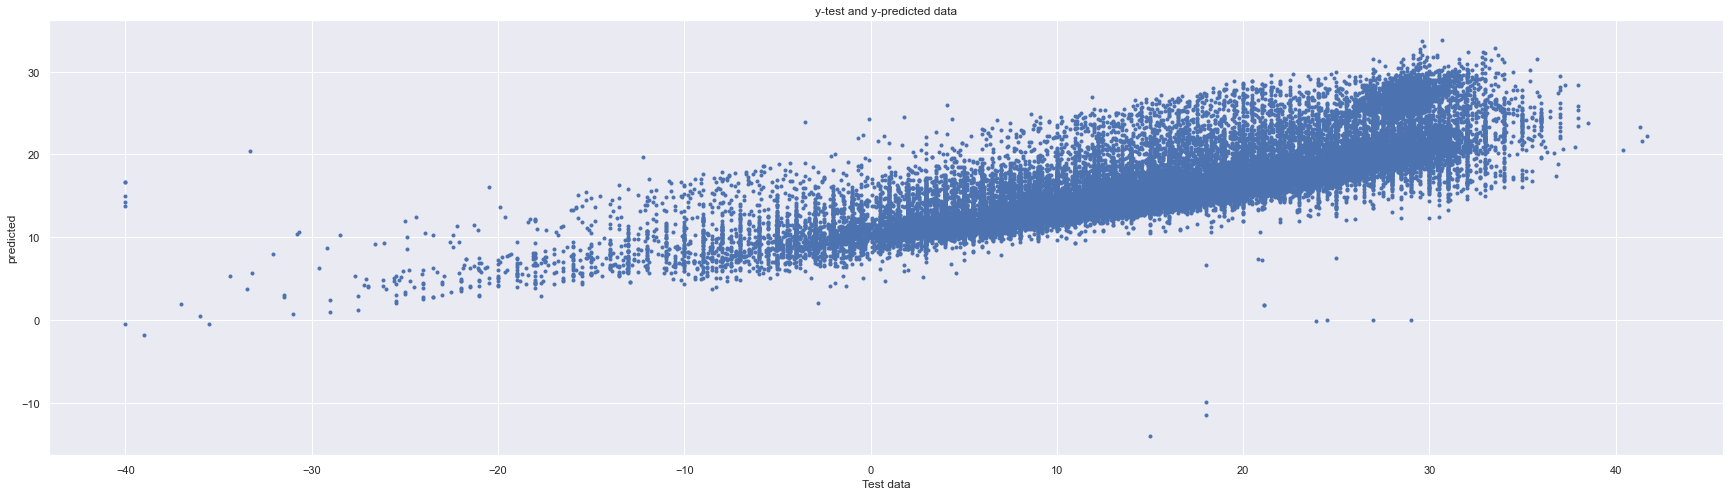

In [561]:
x_ax = range(len(y_test2))

plt.plot(y_test2, y_pred2,".")
plt.title("y-test and y-predicted data")
plt.xlabel('Test data')
plt.ylabel('predicted')
plt.grid(True)
plt.show()

For dataset three we are using gridsearch to pick the best features. 

In [563]:
#Dataset 3  - this takes a long time run, uncomment to un if needed. The above models are performing fairly well, so we are not taking into account this approach
#tree = RandomForestRegressor(n_jobs =2, verbose =1, criterion="absolute_error")
#parameters = {'max_depth':[1, 100], 'n_estimators': [1,100]}


#rr_cv = GridSearchCV(rr, parameters).fit(x_train3, y_train3)

#print(rr.predict([[0, 0, 0, 0,0,0,0,0,0,0,0,0]]))

In [ ]:
#score3 = rr_cv.score(x_train3, y_train3)
#print("R-squared:", score3) 

#y_pred3 = rr_cv.predict(x_test3)

#mse3 = mean_squared_error(y_test3, y_pred3)
#print("MSE: ", mse3)
#print("RMSE: ", mse3*(1/2.0)) 
#mae3 = mean_absolute_error(y_test3,y_pred3) 
#print("MAE: ", mae3)

In [ ]:
#x_ax = range(len(y_test3))
#plt.plot(x_ax, y_test3, linewidth=1, label="original")
#plt.plot(x_ax, y_pred3, linewidth=1.1, label="predicted")
#plt.title("y-test and y-predicted data")
#plt.xlabel('X-axis')
#plt.ylabel('Y-axis')
#plt.legend(loc='best',fancybox=True, shadow=True)
#plt.grid(True)
#plt.show()

## 3.6 Modeling with Timeseries approach (Arima)

### 3.6.0 Arima time series model 

The last model we will run will be the Arima model. The Arima model is a time series model and thus we will be applying this model for each city. For each model, we will be applying scaler, PCA and evulation to pick th PQD at each city level. 

Similar model was used for country level analysis. 

In [340]:
%%capture
!pip install pandas
!pip install plotly-express
!pip install statsmodels
!pip install tqdm

In [341]:
 
import pandas as pd
from sklearn.model_selection import train_test_split
import statsmodels as sm 
from sklearn.metrics import r2_score
from tqdm import tqdm
import plotly.express as px
from sklearn.preprocessing import StandardScaler
# model imports
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm1
from sklearn.metrics import mean_squared_error, r2_score
import itertools
import math
from sklearn.decomposition import PCA
import pickle


In [342]:
def get_city_df(city):
    df = new_weather_df
    df = df[df["City"] == city]
    df["date_idx"] = pd.to_datetime(df.datetime)
    df = df.set_index("date_idx")
    df.index = df.index.to_period("M")
    return df

def get_test_train_valid(city):
    city_df = get_city_df(city)


    train = city_df[(city_df['datetime']> '2018-12') & (city_df['datetime']<= '2019-12')]
    valid = city_df[(city_df['datetime']> '2019-12') & (city_df['datetime']<= '2020-12')]
    test  = city_df[(city_df['datetime']> '2020-12') & (city_df['datetime']<= '2021-12')]
    
    return train, test, valid

def scale(train_x, valid_x, test_x):
    scaler = StandardScaler()
    model_x = pd.concat([train_x, valid_x])

    scaler.fit(model_x)
    model_x = scaler.transform(model_x)
    train_x = scaler.transform(train_x)
    valid_x = scaler.transform(valid_x)
    test_x  = scaler.transform(test_x)
    
    return train_x, valid_x, test_x, model_x

def pca_fitter(train_x, threshold = .99):
    n_features = train_x.shape[1]
    
    for n in range(1, n_features + 1):
        pca_model = PCA(n)
        pca_model.fit(train_x)
        
        if sum(pca_model.explained_variance_ratio_) >= threshold:
            break
    return pca_model


### 3.6.1 Scaling Data By Standard Scalar

### 3.6.2 Hypertuning Model Parameters With Training and Validation Set

In [343]:
def eval_sarimax_excog(train_x, train_y, test_x, test_y, arima_order,\
                       enforce_invertibility, enforce_stationarity):
    # USE THIS
    model = sm1.tsa.statespace.SARIMAX(train_y, exog = train_x, order = arima_order, \
                                       time_varying_regression = True, mle_regression = False,\
                                       measurement_error = True, enforce_invertibility = enforce_invertibility,\
                                       enforce_stationarity = enforce_stationarity
                                      )
    model_fit = model.fit(disp = 0)
    predictions = model_fit.forecast(len(test_x), exog = test_x)
    rmse = math.sqrt(mean_squared_error(test_y, predictions))
    predictions.index = test_y.index
    return model_fit, rmse, predictions

def eval_excog_models_by_rmse(train_x, train_y, test_x, test_y, p_values, d_values, q_values, f):
    arima_orders = itertools.product(*[p_values, d_values, q_values])
    arima_orders = list(arima_orders)
    best_order, best_score = None, float("inf") 
    best_enforce_invertibility = None
    best_stationary = None
    count = 0
    for arima_order in tqdm(arima_orders):
        for enforce_invertibility in [True, False]:
            for enforce_stationarity in [True, False]:
                try:
                    _, rmse, _ = f(train_x, train_y, test_x, test_y, arima_order, \
                                   enforce_invertibility = enforce_invertibility,\
                                   enforce_stationarity = enforce_stationarity)

                    if rmse < best_score:
                        best_score, best_order = rmse, arima_order
                        best_enforce_invertibility = enforce_invertibility
                        best_stationary= enforce_stationarity
                        print(f"ARIMA RMSE = {best_score}")
                except Exception as e:
                    print(e)
                    pass
                count += 1
    print('DONE')
    return best_order, best_enforce_invertibility, best_stationary

def eval_excog_models_by_aic(train_x, train_y, test_x, test_y, p_values, d_values, q_values, f):
    arima_orders = itertools.product(*[p_values, d_values, q_values])
    arima_orders = list(arima_orders)
    best_order, best_score = None, float("inf") 
    best_enforce_invertibility = None
    best_stationary = None
    count = 0
    for arima_order in tqdm(arima_orders):
        for enforce_invertibility in [True, False]:
            for enforce_stationarity in [True, False]:
                try:
                    model_fit, _, _ = f(train_x, train_y, test_x, test_y, arima_order, \
                                   enforce_invertibility = enforce_invertibility,\
                                   enforce_stationarity = enforce_stationarity)

                    if model_fit.aic < best_score:
                        best_score, best_order = model_fit.aic, arima_order
                        best_enforce_invertibility = enforce_invertibility
                        best_stationary= enforce_stationarity
                        print(f"ARIMA AIC = {best_score}")
                except Exception as e:
                    print(e)
                    pass
                count += 1
    print('DONE')
    return best_order, best_enforce_invertibility, best_stationary


In [354]:
def ml(city, f = eval_excog_models_by_rmse, p_values = [0, 1, 2], d_values = [0, 1, 2], q_values = [0, 1, 2]):
    train, test, valid = get_test_train_valid(city)

    train_x, train_y = train[train.columns[0:-5]], train["temperature"]
    test_x, test_y = test[test.columns[0:-5]], test["temperature"]
    valid_x, valid_y = valid[valid.columns[0:-5]], valid["temperature"]

    train_x, valid_x, test_x, model_x = scale(train_x, valid_x, test_x)

    pca_model = pca_fitter(train_x)
    train_x = pca_model.transform(train_x)
    valid_x = pca_model.transform(valid_x) 
    test_x  = pca_model.transform(test_x)
    model_x = pca_model.transform(model_x)
    
    model_y = pd.concat([train_y, valid_y])

    best_order, best_enforce_invertibility, best_stationary = f(train_x, train_y, valid_x, valid_y, p_values, d_values, q_values, eval_sarimax_excog)

    model_fit, rmse, predictions = eval_sarimax_excog(model_x, model_y, test_x, test_y, best_order, best_enforce_invertibility, best_stationary)
    
    return best_order, best_enforce_invertibility, best_stationary, model_fit, test_y, predictions

In [374]:
def plot(df, city, layout, line1 = 'temperature', line2 = 'Predictions', x = 'datetime'):
    from plotly.subplots import make_subplots
    import plotly.graph_objects as go


    fig = go.Figure(layout = layout)
    trace_1 = go.Line(name = f"Actual {city} Avg Monthly Temp", 
                     x = df[x],
                     y = df[line1])
                     


    trace_2 = go.Line(name = f"Predictions of {city} Avg Monthly Temp", 
                     x = df[x],
                     y = df[line2])

    fig.add_trace(trace_1)
    fig.add_trace(trace_2)

    
    return fig

We selected these five cities based on these cities having the high pollution levels (pm2.5) from section 2. We want to see based on the dataset we have on different metrics of pollutions can we closely predict the tempatures for these cities. 

In [388]:
%%capture

results = {"Aguascalientes": None, "Delhi": None, 
           "Bishkek": None, "Lahore": None, 
           "Anyang": None}

for k in results.keys():
    results[k] = ml(k, f= eval_excog_models_by_aic)
    


In [360]:
import pickle
from sklearn.metrics import mean_absolute_error

In [247]:
with open('Temperatue_Pollution_Time_Series.pickle', 'wb') as fh:
   pickle.dump(results, fh)

In [336]:
pickle_off = open ("Temperatue_Pollution_Time_Series.pickle", "rb")
results = pickle.load(pickle_off)

In [572]:
!pip install -U kaleido

Below we are graphing the resutls of the five cities. 

In [573]:
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 600em; }</style>"))
import os

if not os.path.exists("images"):
    os.mkdir("images")
    
for k, v in results.items():
    train, test, valid = get_test_train_valid(k)
    
    p, q, d = v[0]

    model = pd.concat([train, valid])
    model['Predictions'] = v[3].forecasts[0]
    x, y = model['Predictions'], model['temperature']
    r2  = r2_score(x, y)
    mse = mean_squared_error(x, y)
    mae = mean_absolute_error(x, y)
    layout = dict(title = f'Training Set-- {k} P: {p} Q: {q} D: {d}  MAE: {round(mae, 2)} MSE: {round(mse, 2)}',
          xaxis=dict(title='Monthly'),
          yaxis=dict(title='Temperature'))
    
    fig = plot(model, k, layout)
    fig.show()
    p, q, d = v[0]
    test['Predictions'] = v[-1]
    
    x, y = test['Predictions'], test['temperature']
    r2  = r2_score(x, y)
    mse = mean_squared_error(x, y)
    mae = mean_absolute_error(x, y)
    
    layout = dict(title = f'Holdout Set-- {k} P: {p} Q: {q} D: {d} MAE: {round(mae, 2)} MSE: {round(mse, 2)}',
              xaxis=dict(title='Monthly'),
              yaxis=dict(title='Temperature'))
    
    fig = plot(test, k, layout)
    #fig.write_image(f"images/holdout_{k}_p{p}_q{q}_d{d}.png")
    fig.show()
    
    

/Users/ashleyfchang/opt/anaconda3/envs/cis545/lib/python3.7/site-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




/Users/ashleyfchang/opt/anaconda3/envs/cis545/lib/python3.7/site-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




/Users/ashleyfchang/opt/anaconda3/envs/cis545/lib/python3.7/site-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




/Users/ashleyfchang/opt/anaconda3/envs/cis545/lib/python3.7/site-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




/Users/ashleyfchang/opt/anaconda3/envs/cis545/lib/python3.7/site-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




/Users/ashleyfchang/opt/anaconda3/envs/cis545/lib/python3.7/site-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




/Users/ashleyfchang/opt/anaconda3/envs/cis545/lib/python3.7/site-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




/Users/ashleyfchang/opt/anaconda3/envs/cis545/lib/python3.7/site-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




/Users/ashleyfchang/opt/anaconda3/envs/cis545/lib/python3.7/site-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




/Users/ashleyfchang/opt/anaconda3/envs/cis545/lib/python3.7/site-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.


